In [1]:
import pandas as pd
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import onekey_algo.custom.components as okcomp
from onekey_algo import get_param_in_cwd

plt.rcParams['figure.dpi'] = 300
model_names = get_param_in_cwd('compare_algos')
# 获取配置
task = get_param_in_cwd('task_column')
sel_m = get_param_in_cwd('sel_model')
labelf = get_param_in_cwd('label_file') or os.path.join(mydir, 'label.csv')
group_info = get_param_in_cwd('dataset_column') or 'group'

# 读取label文件。
labels = [task]
label_data_ = pd.read_csv(labelf)
label_data_['ID'] = label_data_['ID'].map(lambda x: f"{x}.nii.gz" if not (f"{x}".endswith('.nii.gz') or  f"{x}".endswith('.nii')) else x)
label_data_ = label_data_[['ID', group_info, task]]
label_data_ = label_data_.dropna(axis=0)

ids = label_data_['ID']
print(label_data_.columns)
label_data = label_data_
label_data

Index(['ID', 'group', 'label'], dtype='object')


ID  group  label
0       1.nii.gz  train      0
1     100.nii.gz    val      1
2    1001.nii.gz  train      0
3    1003.nii.gz  train      1
4     101.nii.gz    val      0
..           ...    ...    ...
755   978.nii.gz  train      0
756   980.nii.gz  train      1
757   981.nii.gz  train      1
758   984.nii.gz  train      1
759    99.nii.gz  train      1

[760 rows x 3 columns]

# 训练集-Nomogram

ID   -0_x  Habitat_ExtraTrees   -0_y  Habitat_LR  -0_x  \
0       1.nii.gz  0.696               0.304  0.983       0.017   1.0   
1    1001.nii.gz  0.528               0.472  0.960       0.040   0.8   
2    1003.nii.gz  0.179               0.821  0.064       0.936   0.0   
3    1024.nii.gz  0.592               0.408  0.844       0.156   0.8   
4    1029.nii.gz  0.397               0.603  0.169       0.831   0.2   
..           ...    ...                 ...    ...         ...   ...   
437   978.nii.gz  0.725               0.275  0.987       0.013   0.8   
438   980.nii.gz  0.249               0.751  0.163       0.837   0.0   
439   981.nii.gz  0.338               0.662  0.235       0.765   0.8   
440   984.nii.gz  0.491               0.509  0.108       0.892   0.8   
441    99.nii.gz  0.615               0.385  0.445       0.555   0.4   

     Habitat_KNN   -0_y  Habitat_RandomForest   -0_x  Habitat_XGBoost   -0_y  \
0            0.0  0.802                 0.198  0.749            0.251  0.534   
1            0.2  0.440                 0.560  0.449            0.551  0.501   
2            1.0  0.229                 0.771  0.142            0.858  0.466   
3            0.2  0.663                 0.337  0.682            0.318  0.501   
4            0.8  0.172                 0.828  0.331            0.669  0.466   
..           ...    ...                   ...    ...              ...    ...   
437          0.2  0.742                 0.258  0.803            0.197  0.501   
438          1.0  0.258                 0.742  0.205            0.795  0.466   
439          0.2  0.313                 0.687  0.229            0.771  0.466   
440          0.2  0.612                 0.388  0.394            0.606  0.501   
441          0.6  0.253                 0.747  0.383            0.617  0.499   

     Habitat_LightGBM     -0  Habitat_MLP  location  group  label  
0               0.466  0.940        0.060         2  train      0  
1               0.499  0.909        0.091         2  train      0  
2               0.534  0.029        0.971         1  train      1  
3               0.499  0.919        0.081         2  train      0  
4               0.534  0.138        0.862         1  train      1  
..                ...    ...          ...       ...    ...    ...  
437             0.499  0.901        0.099         2  train      0  
438             0.534  0.064        0.936         1  train      1  
439             0.534  0.159        0.841         1  train      1  
440             0.499  0.120        0.880         1  train      1  
441             0.501  0.317        0.683         1  train      1  

[442 rows x 18 columns]

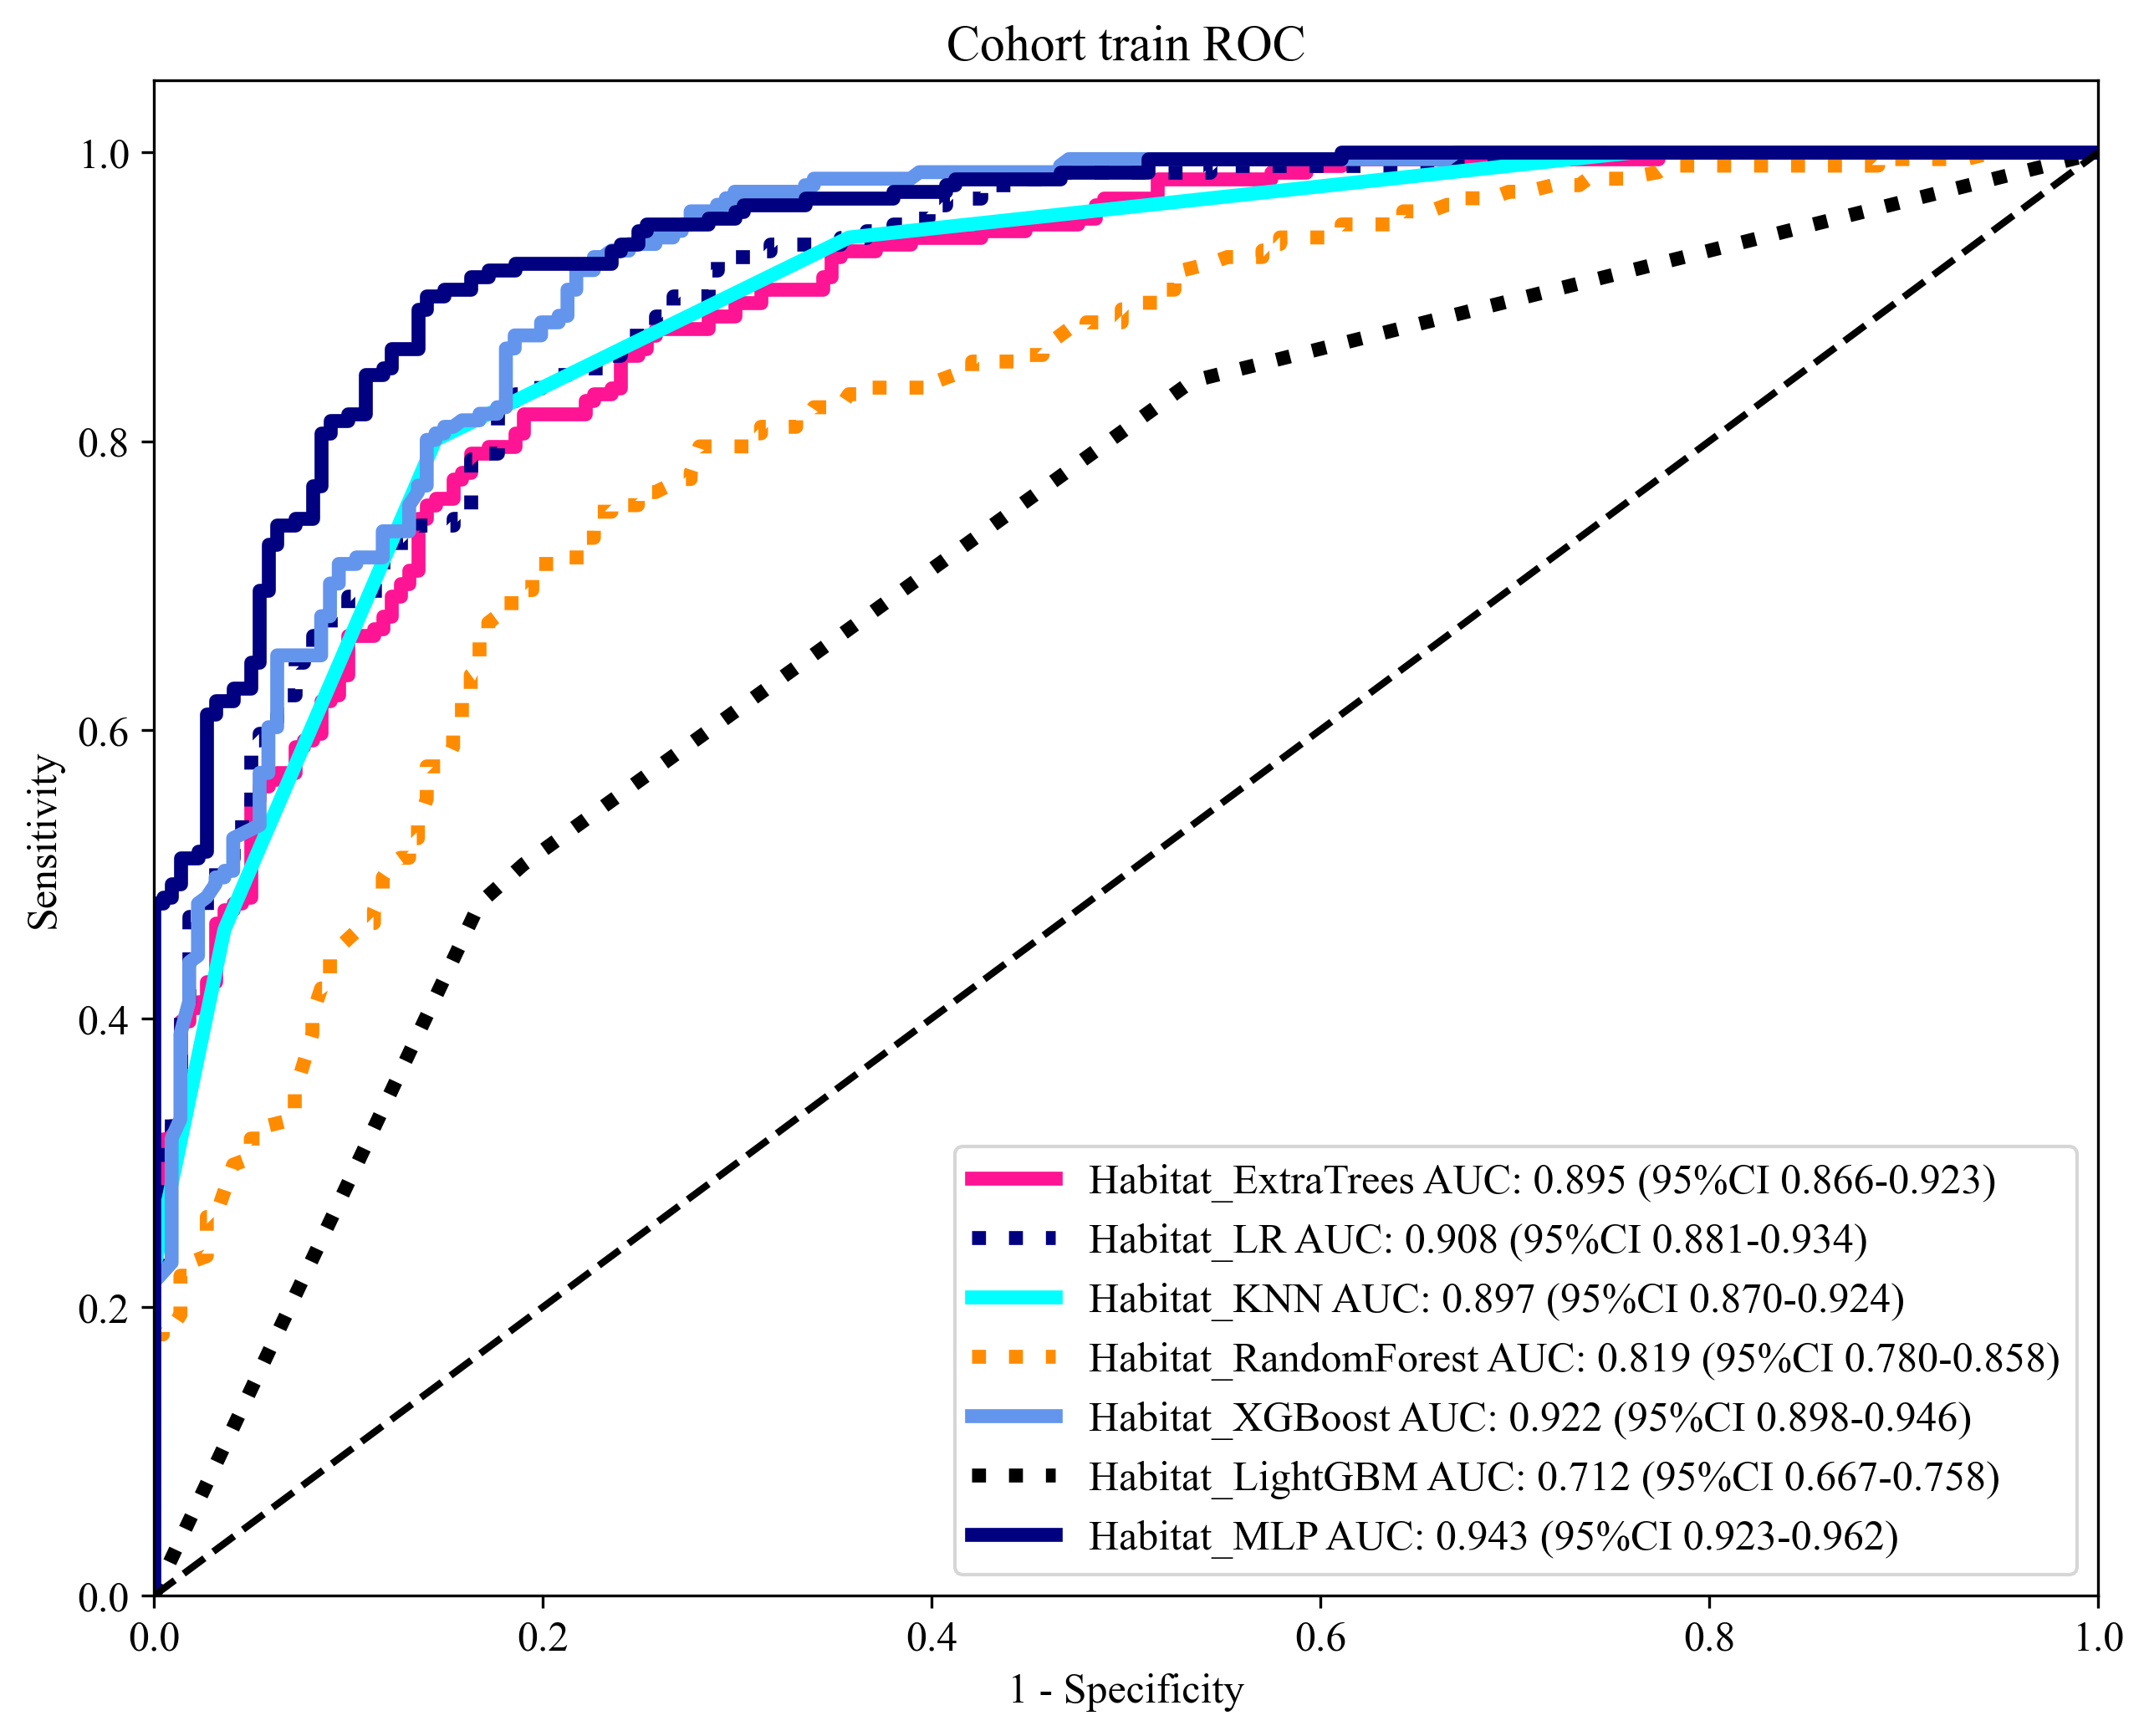

Signature  Accuracy    AUC           95% CI  Sensitivity  \
0    Habitat_ExtraTrees     0.814  0.895  0.8663 - 0.9228        0.792   
1            Habitat_LR     0.824  0.908  0.8814 - 0.9336        0.833   
2           Habitat_KNN     0.828  0.897  0.8695 - 0.9244        0.801   
3  Habitat_RandomForest     0.762  0.819  0.7805 - 0.8579        0.751   
4       Habitat_XGBoost     0.851  0.922  0.8979 - 0.9460        0.928   
5      Habitat_LightGBM     0.658  0.712  0.6670 - 0.7577        0.507   
6           Habitat_MLP     0.880  0.943  0.9229 - 0.9621        0.900   

   Specificity    PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0        0.837  0.829  0.801      0.829   0.792  0.810      0.509  train  
1        0.814  0.818  0.829      0.818   0.833  0.825      0.494  train  
2        0.855  0.847  0.811      0.847   0.801  0.823      0.600  train  
3        0.774  0.769  0.757      0.769   0.751  0.760      0.495  train  
4        0.774  0.804  0.914      0.804   0.928  0.861      0.431  train  
5        0.810  0.727  0.622      0.727   0.507  0.597      0.501  train  
6        0.860  0.865  0.896      0.865   0.900  0.882      0.471  train

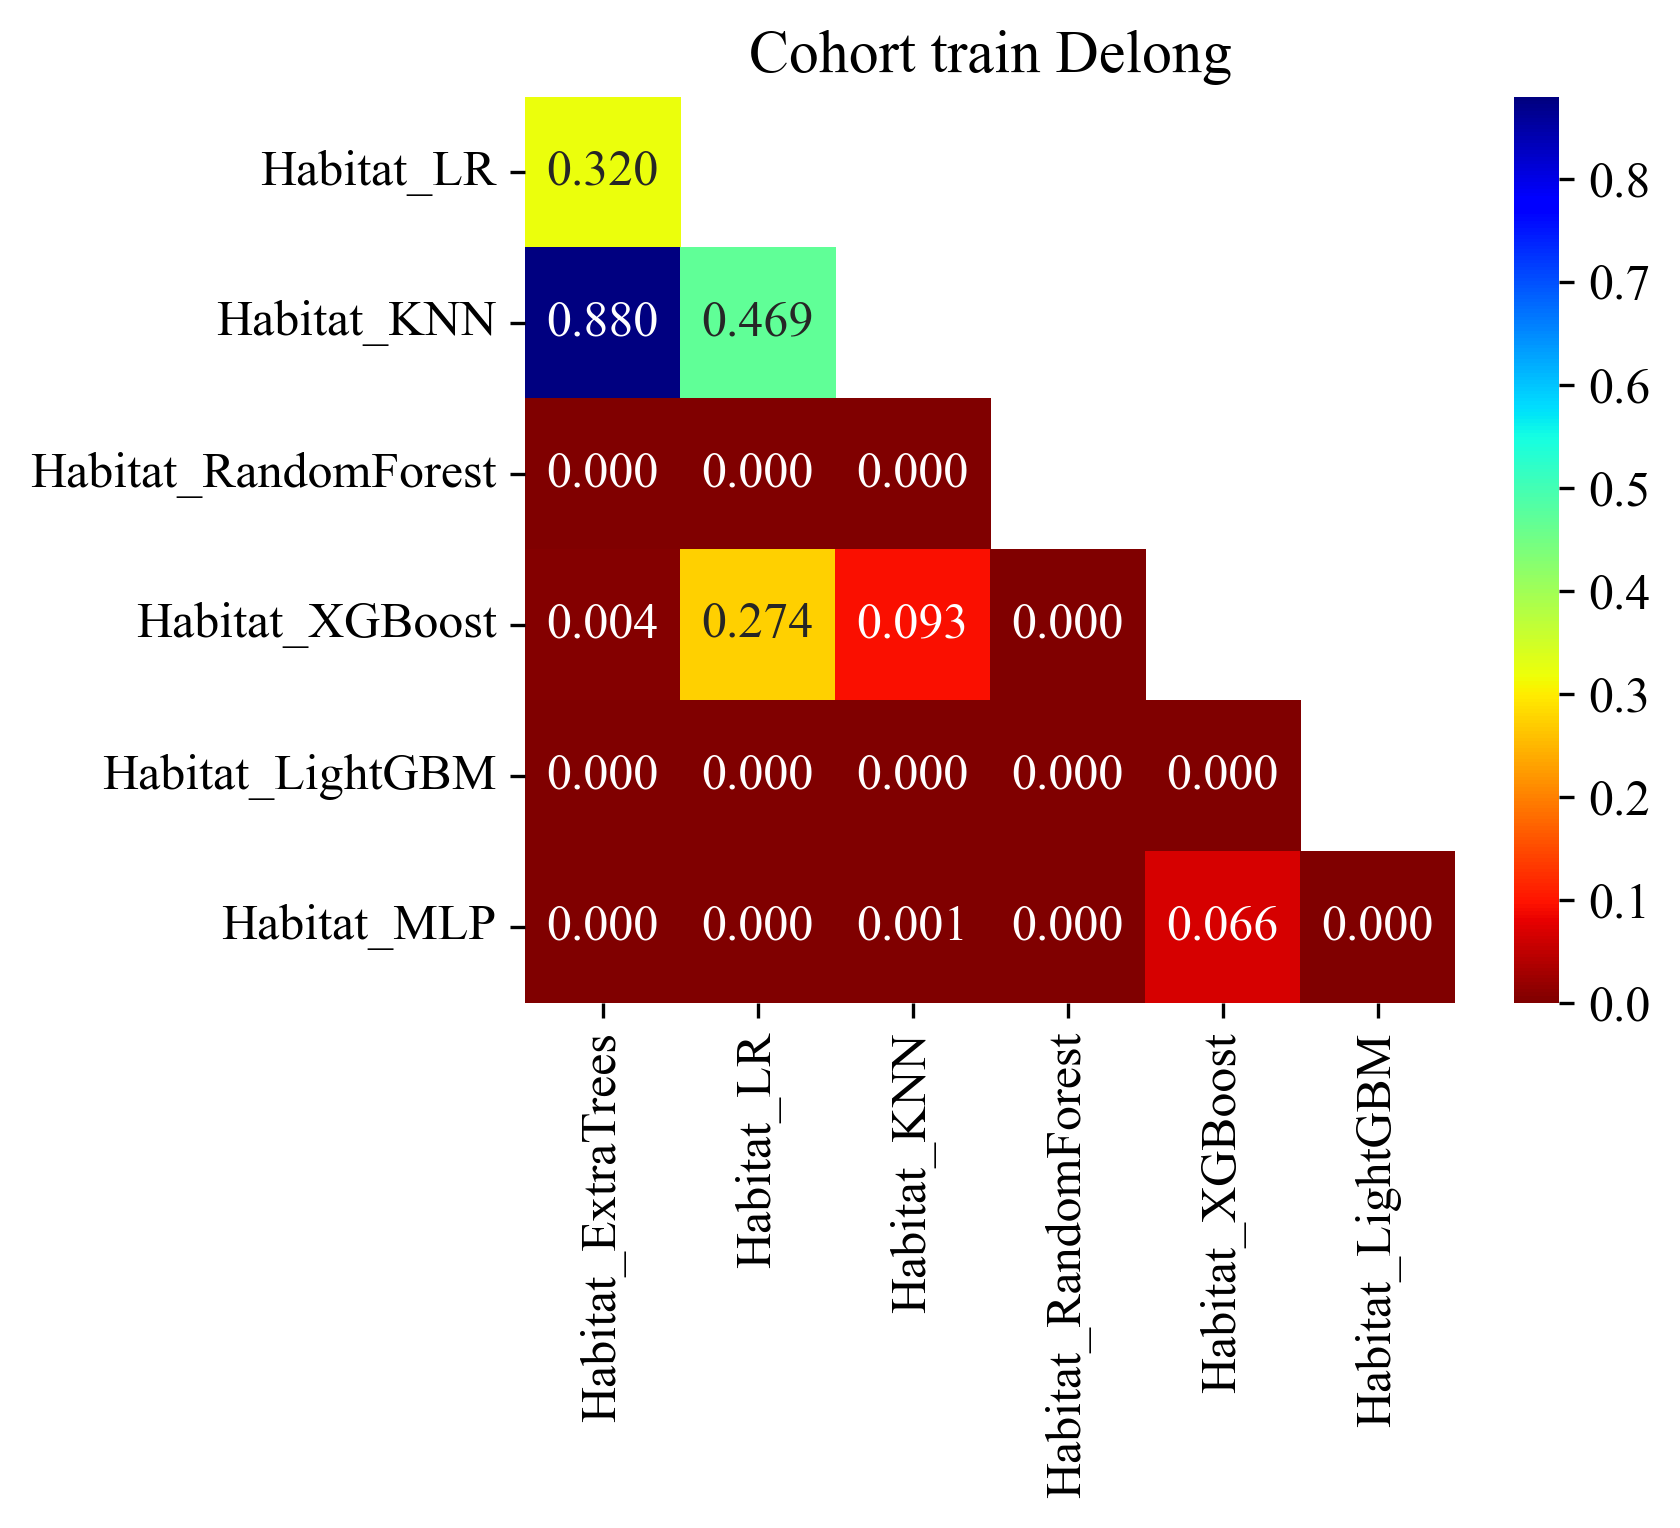

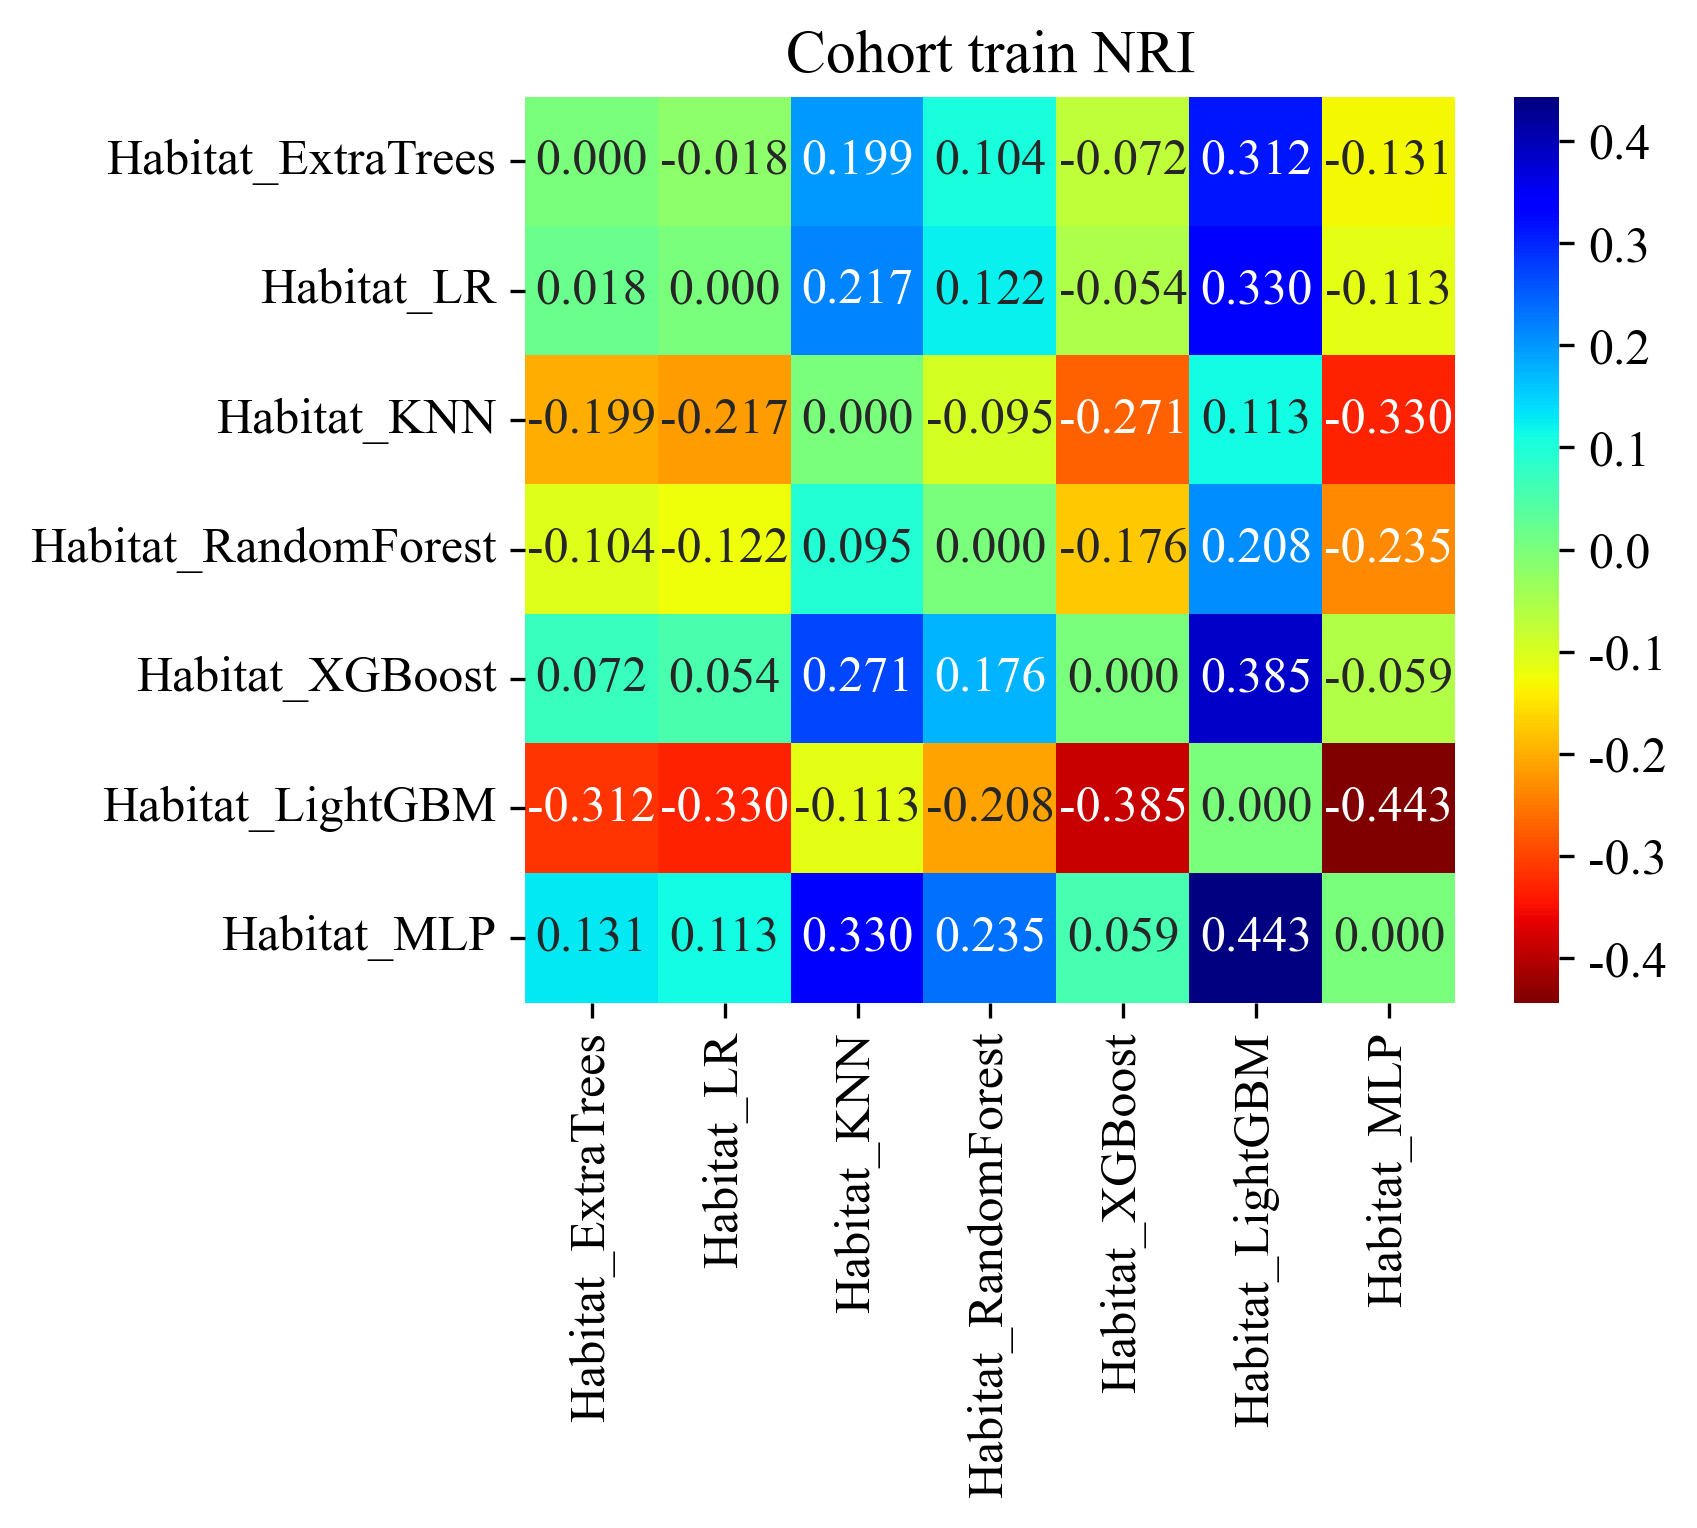

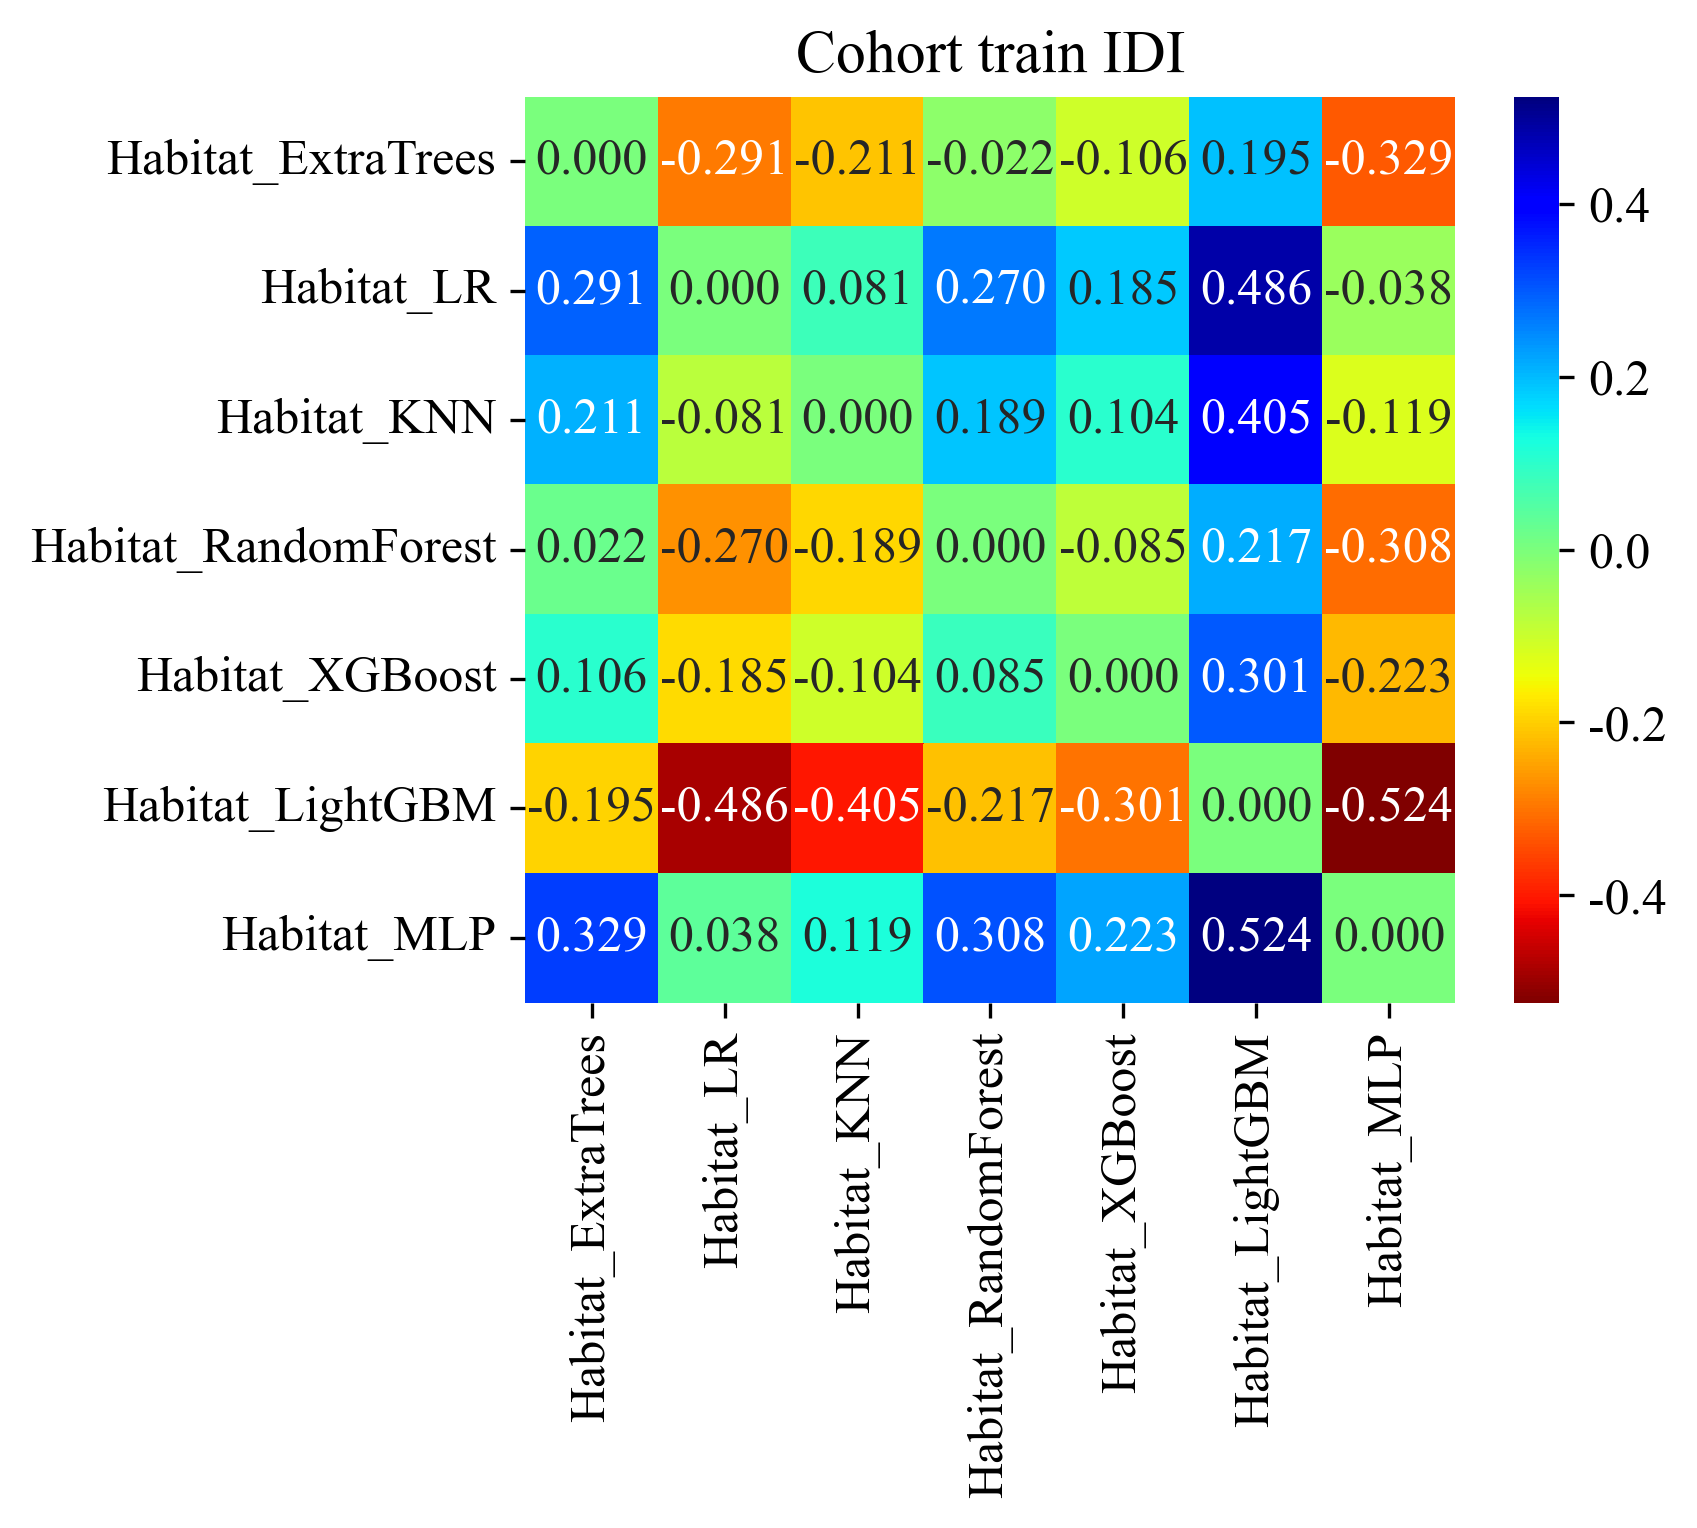

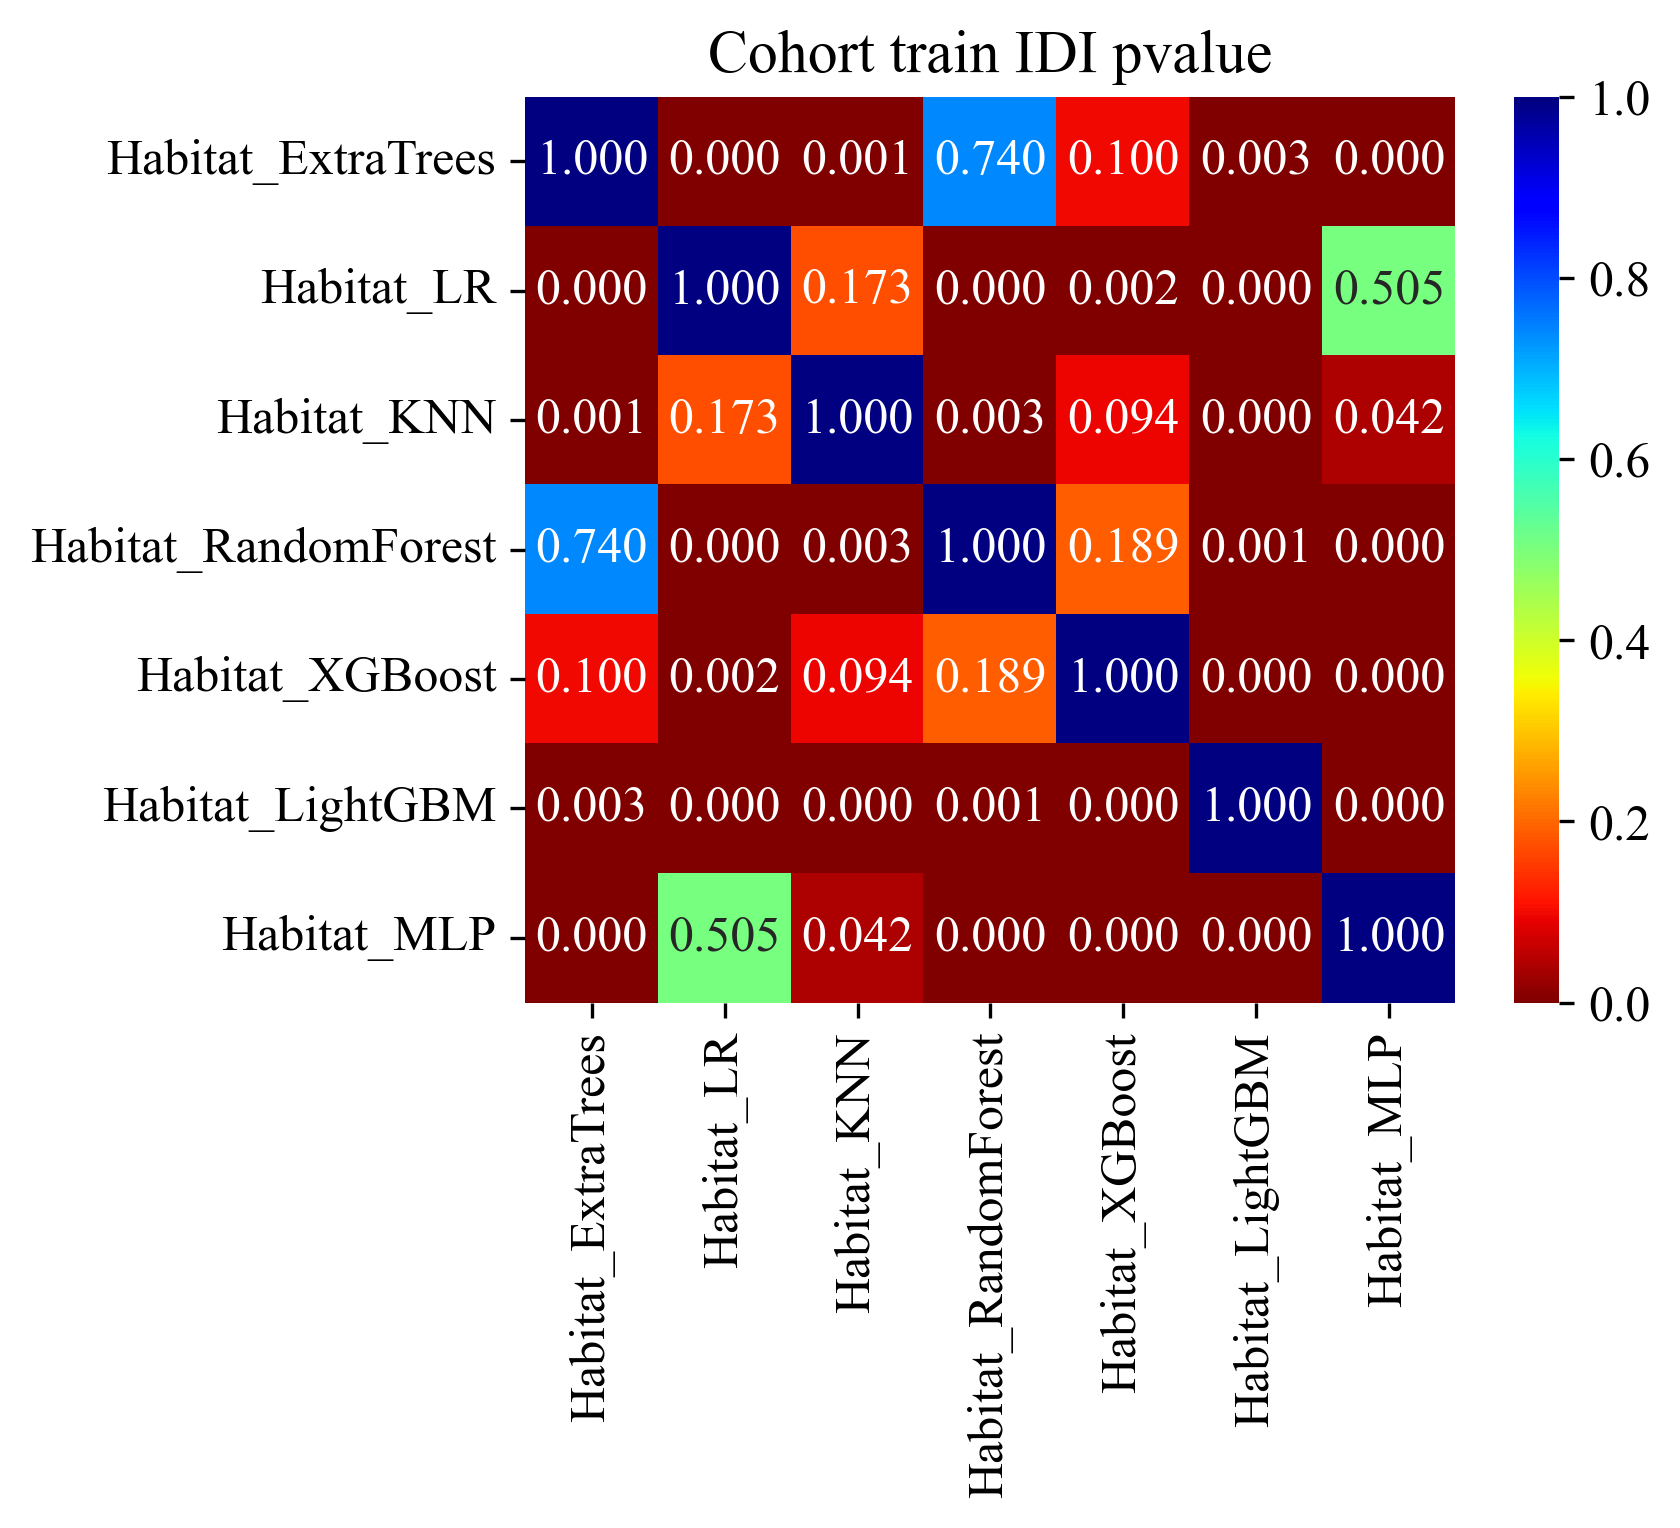

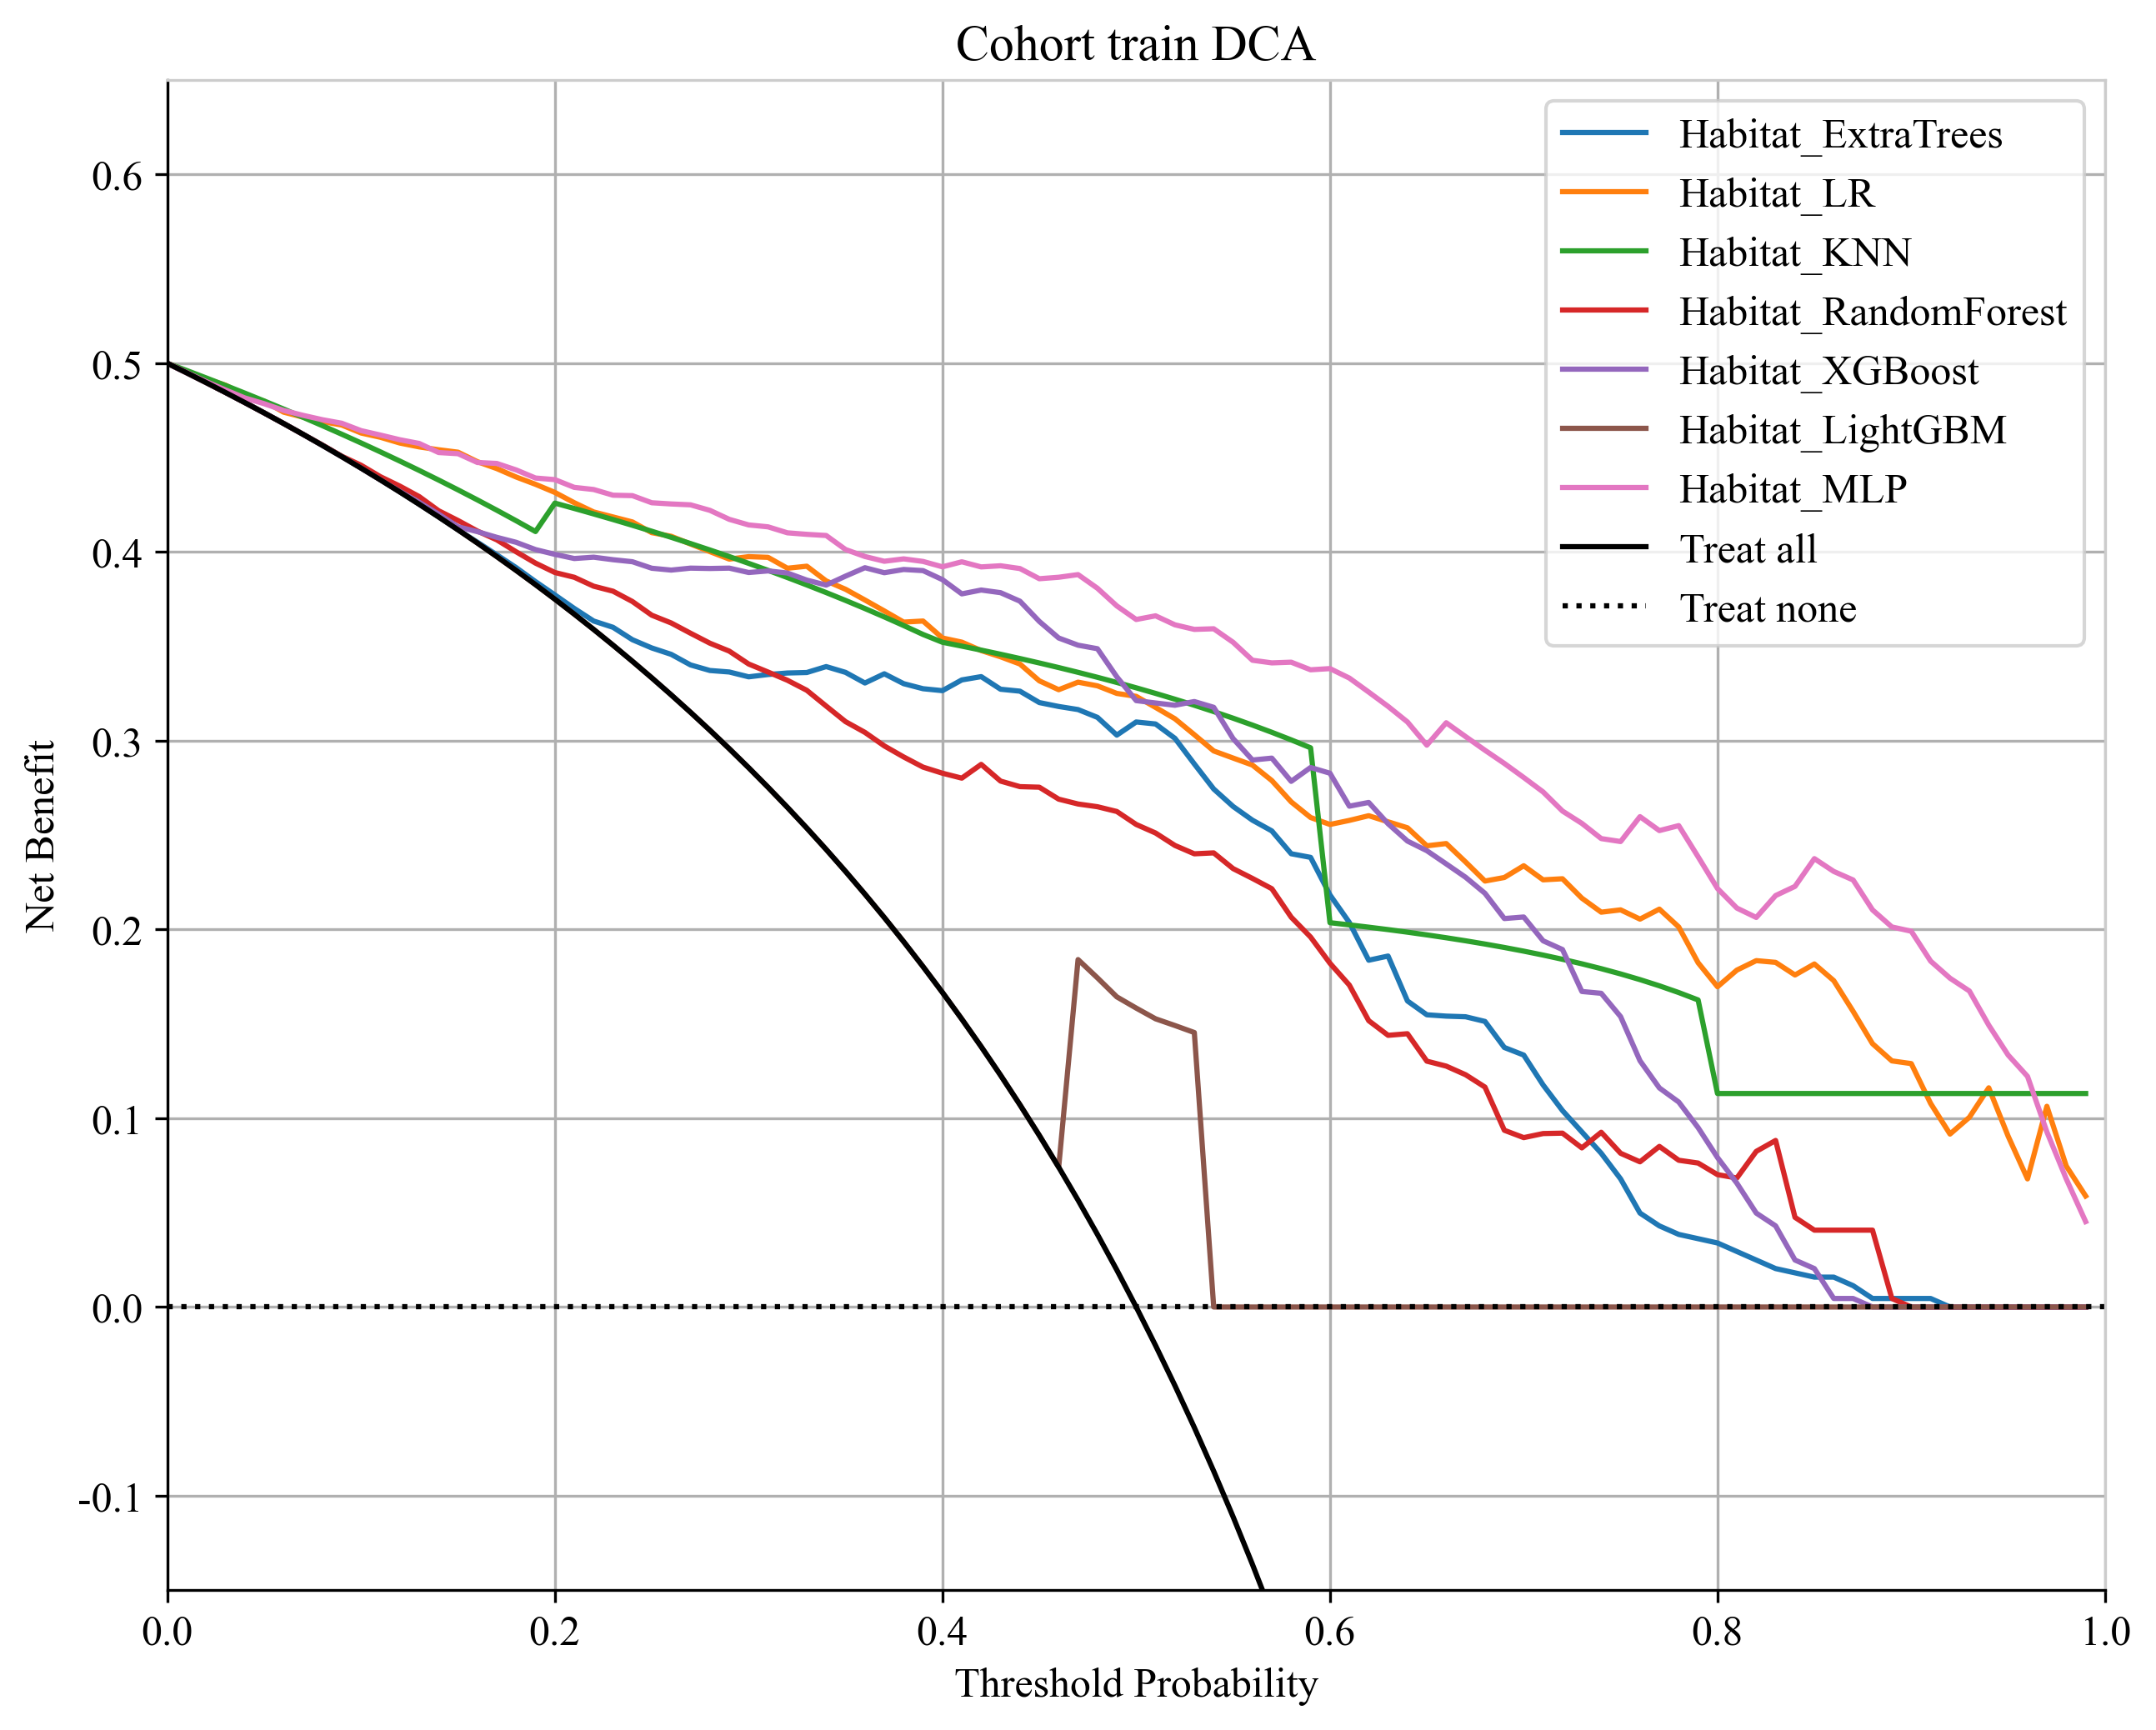

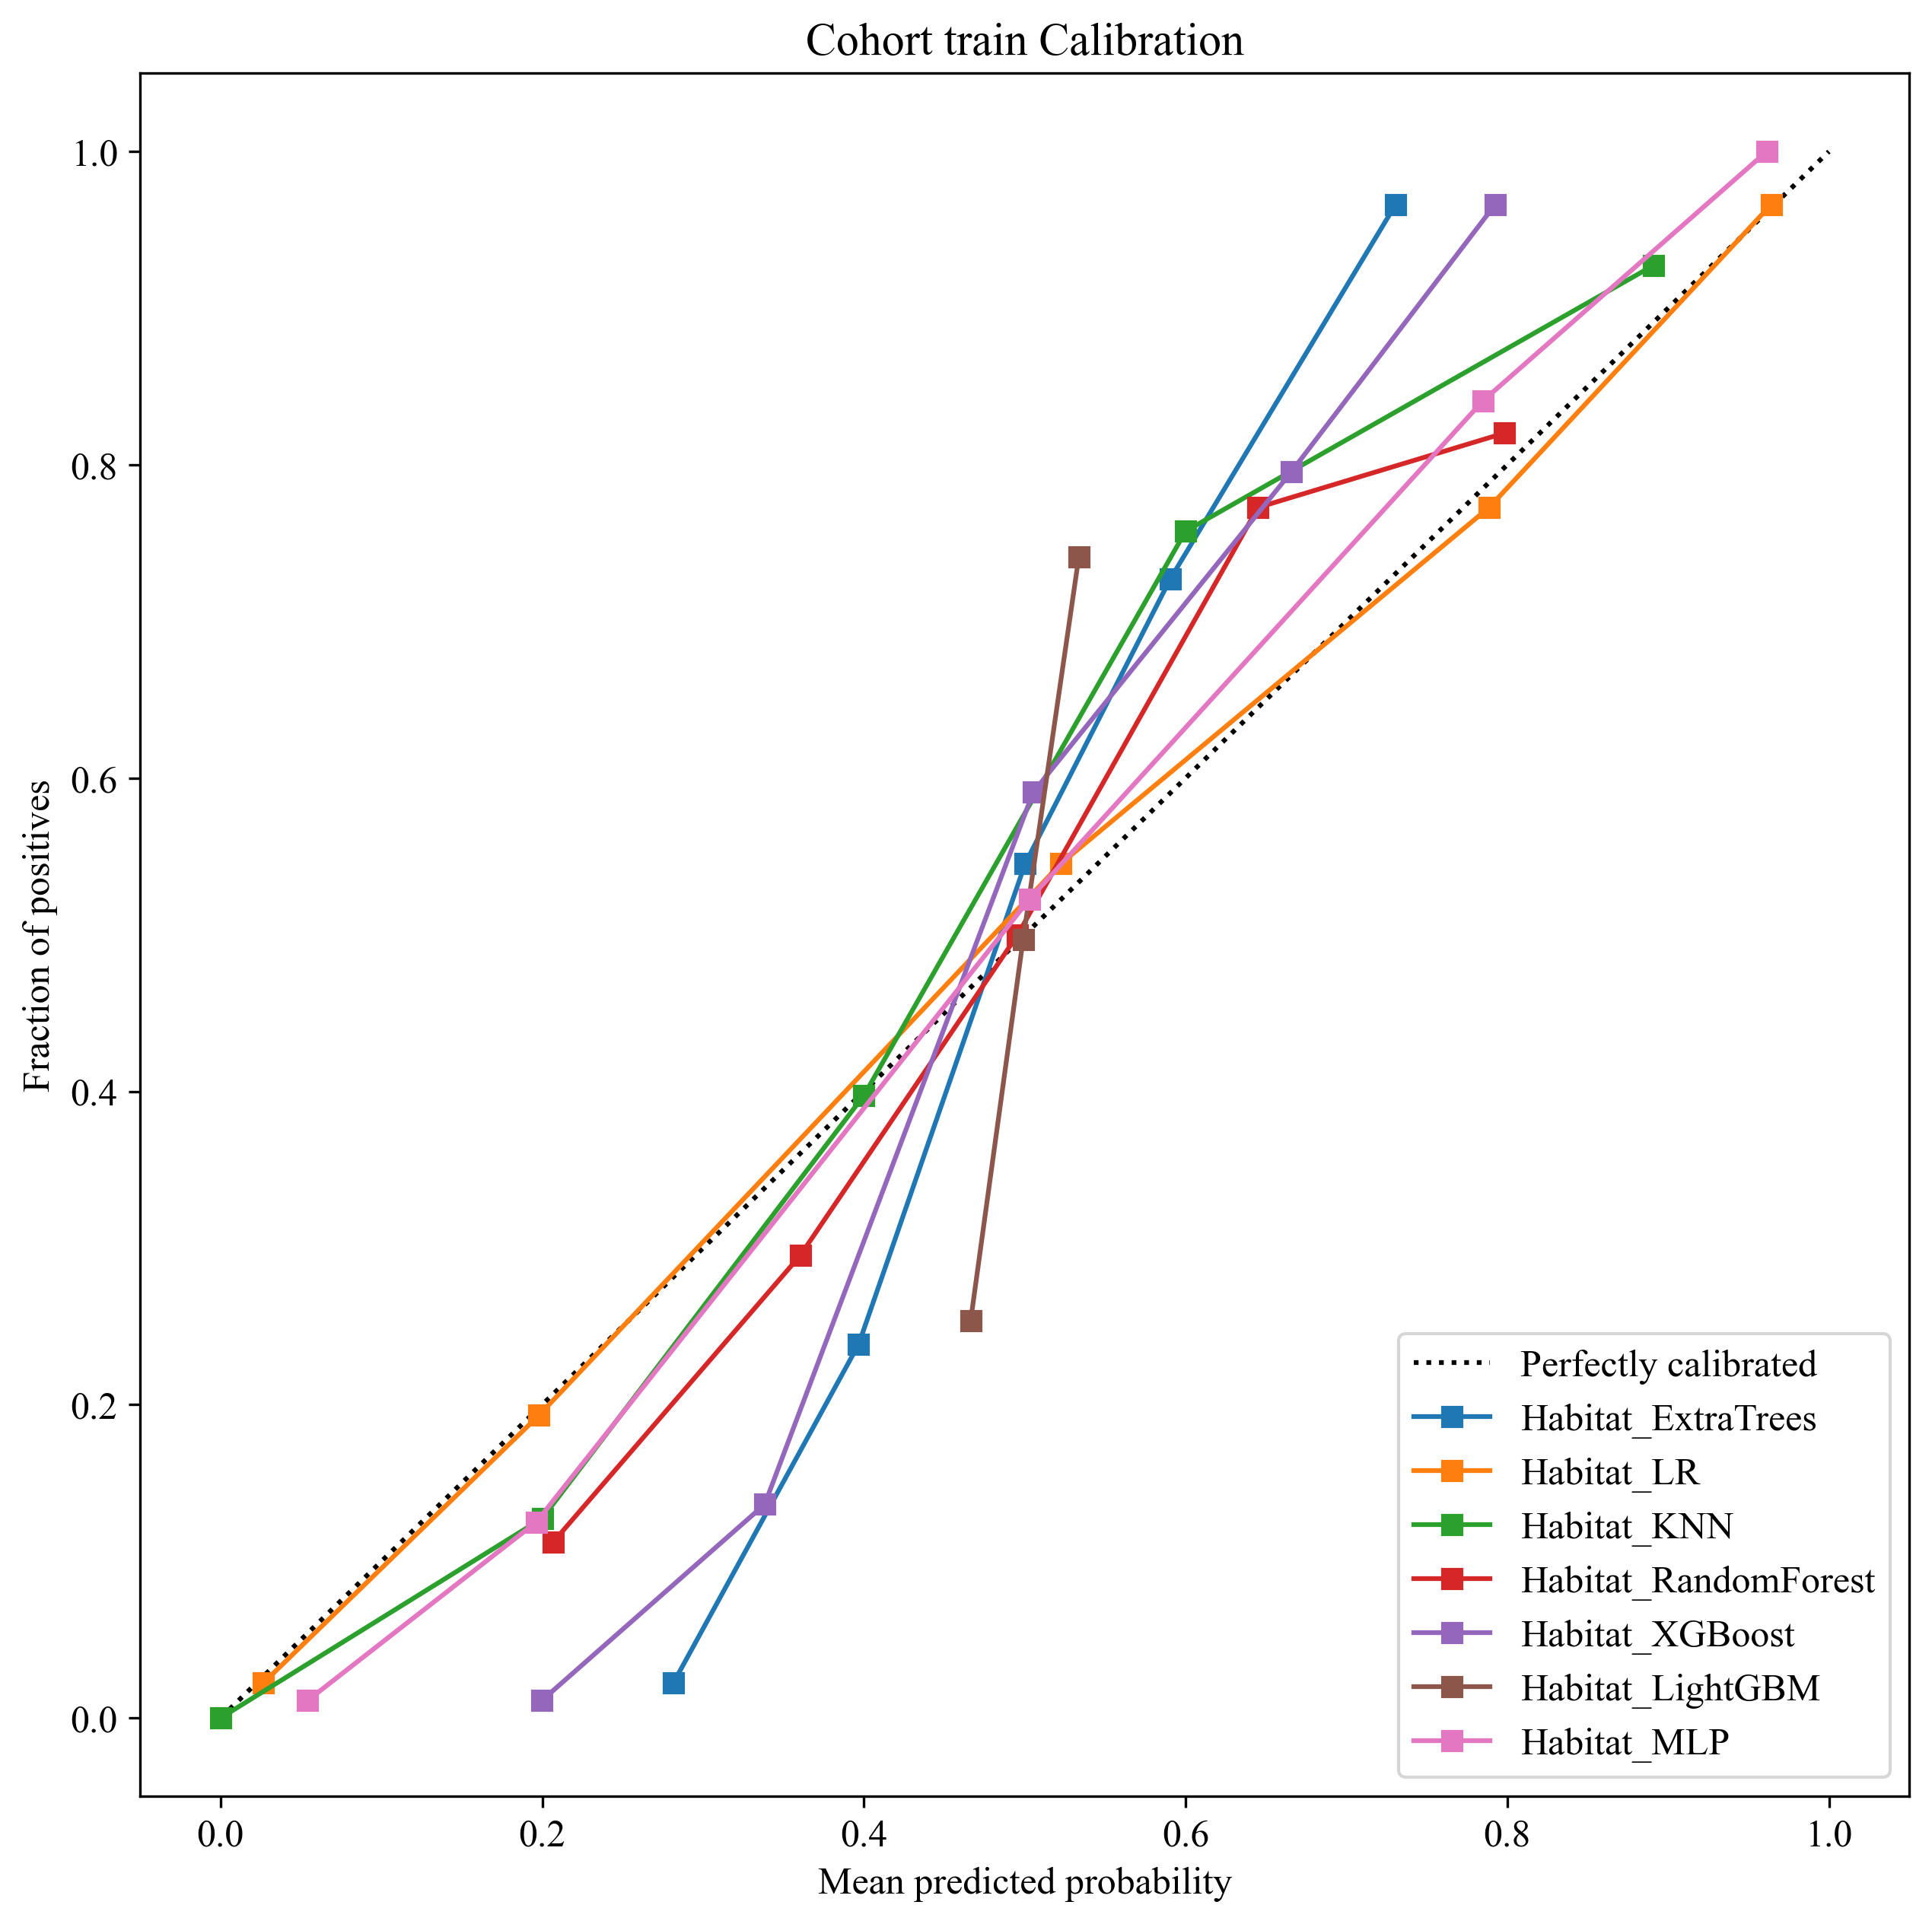

ID   -0_x  Habitat_ExtraTrees   -0_y  Habitat_LR  -0_x  \
0     100.nii.gz  0.621               0.379  0.270       0.730   0.8   
1     101.nii.gz  0.453               0.547  0.337       0.663   0.2   
2    1015.nii.gz  0.408               0.592  0.512       0.488   0.2   
3    1026.nii.gz  0.439               0.561  0.521       0.479   0.2   
4    1033.nii.gz  0.532               0.468  0.677       0.323   0.4   
..           ...    ...                 ...    ...         ...   ...   
182   903.nii.gz  0.570               0.430  0.745       0.255   0.2   
183   909.nii.gz  0.337               0.663  0.044       0.956   0.0   
184   921.nii.gz  0.680               0.320  0.983       0.017   0.8   
185   923.nii.gz  0.356               0.644  0.023       0.977   0.2   
186   926.nii.gz  0.750               0.250  0.995       0.005   1.0   

     Habitat_KNN   -0_y  Habitat_RandomForest   -0_x  Habitat_XGBoost   -0_y  \
0            0.2  0.337                 0.663  0.666            0.334  0.501   
1            0.8  0.313                 0.687  0.456            0.544  0.501   
2            0.8  0.359                 0.641  0.225            0.775  0.501   
3            0.8  0.418                 0.582  0.392            0.608  0.466   
4            0.6  0.646                 0.354  0.672            0.328  0.501   
..           ...    ...                   ...    ...              ...    ...   
182          0.8  0.354                 0.646  0.676            0.324  0.501   
183          1.0  0.110                 0.890  0.480            0.520  0.466   
184          0.2  0.524                 0.476  0.680            0.320  0.501   
185          0.8  0.340                 0.660  0.368            0.632  0.466   
186          0.0  0.779                 0.221  0.800            0.200  0.534   

     Habitat_LightGBM     -0  Habitat_MLP  location group  label  
0               0.499  0.280        0.720         1   val      1  
1               0.499  0.315        0.685         2   val      0  
2               0.499  0.237        0.763         2   val      0  
3               0.534  0.502        0.498         1   val      1  
4               0.499  0.485        0.515         2   val      0  
..                ...    ...          ...       ...   ...    ...  
182             0.499  0.480        0.520         1   val      1  
183             0.534  0.062        0.938         1   val      1  
184             0.499  0.898        0.102         2   val      0  
185             0.534  0.104        0.896         1   val      1  
186             0.466  0.966        0.034         2   val      0  

[187 rows x 18 columns]

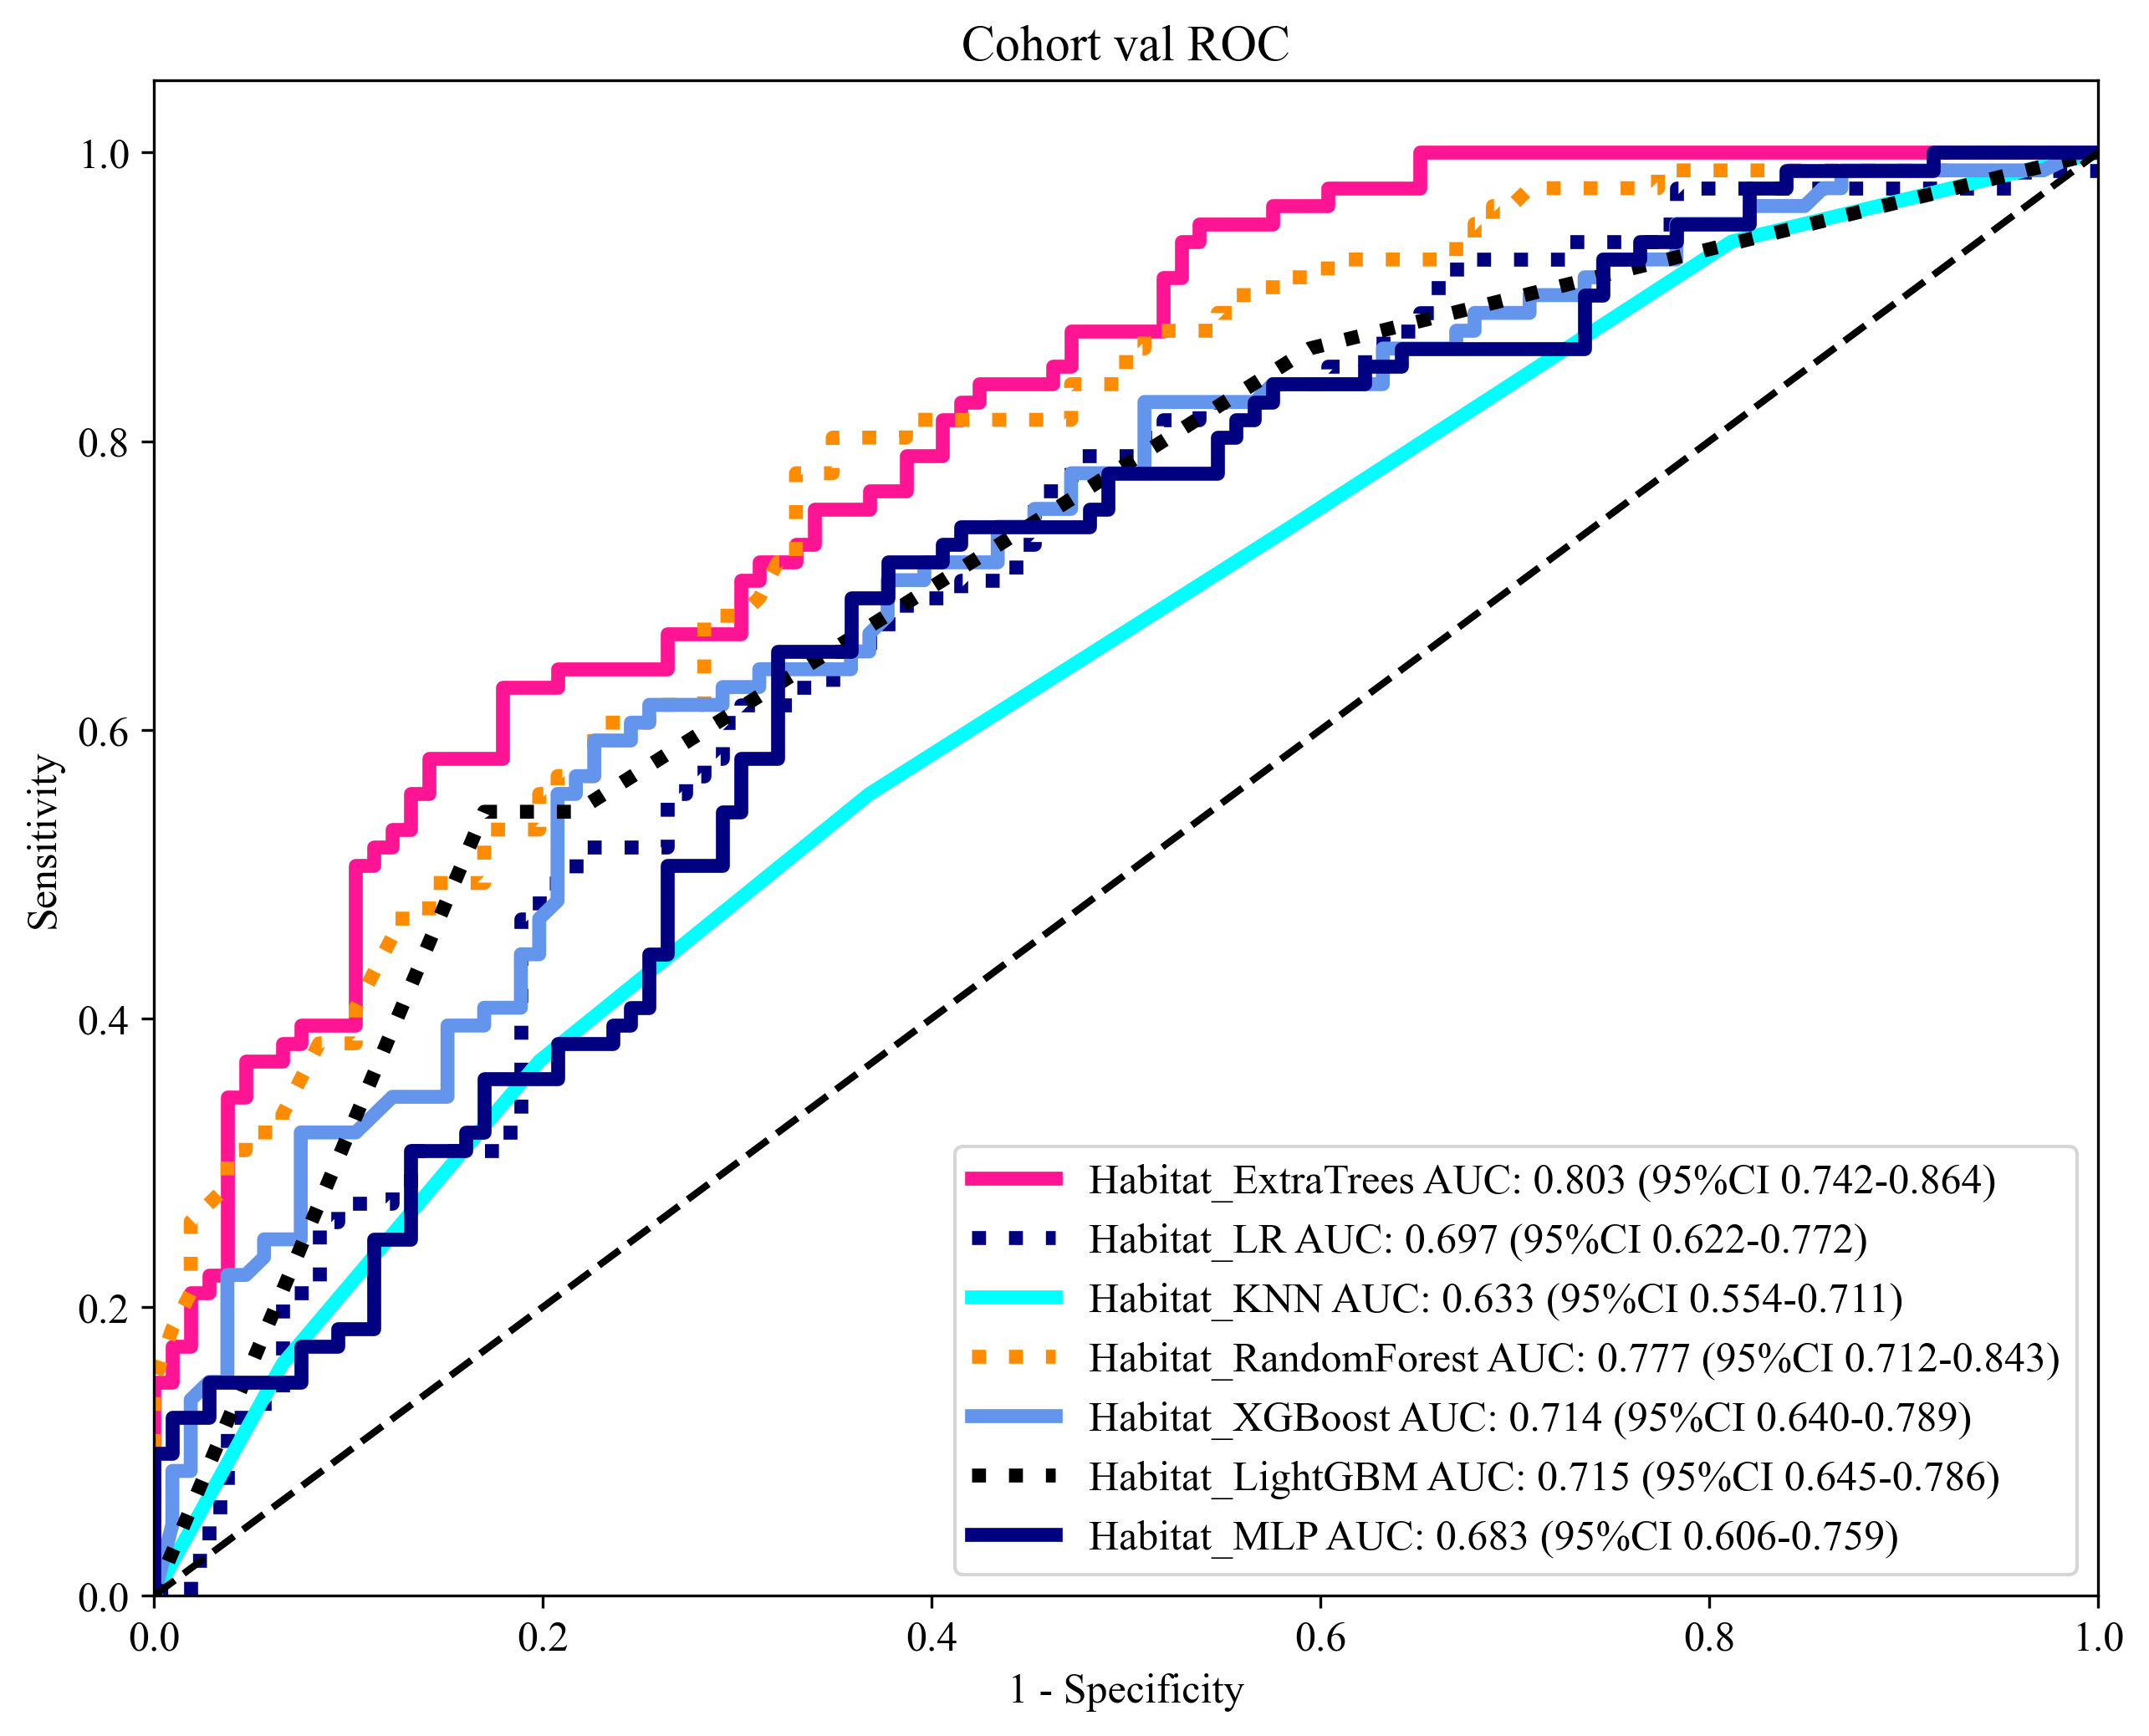

Signature  Accuracy    AUC           95% CI  Sensitivity  \
0     Habitat_ExtraTrees     0.814  0.895  0.8663 - 0.9228        0.792   
1             Habitat_LR     0.824  0.908  0.8814 - 0.9336        0.833   
2            Habitat_KNN     0.828  0.897  0.8695 - 0.9244        0.801   
3   Habitat_RandomForest     0.762  0.819  0.7805 - 0.8579        0.751   
4        Habitat_XGBoost     0.851  0.922  0.8979 - 0.9460        0.928   
5       Habitat_LightGBM     0.658  0.712  0.6670 - 0.7577        0.507   
6            Habitat_MLP     0.880  0.943  0.9229 - 0.9621        0.900   
7     Habitat_ExtraTrees     0.738  0.803  0.7422 - 0.8641        0.630   
8             Habitat_LR     0.642  0.697  0.6219 - 0.7725        0.790   
9            Habitat_KNN     0.599  0.633  0.5539 - 0.7112        0.556   
10  Habitat_RandomForest     0.717  0.777  0.7116 - 0.8429        0.802   
11       Habitat_XGBoost     0.695  0.714  0.6403 - 0.7886        0.593   
12      Habitat_LightGBM     0.706  0.715  0.6450 - 0.7858        0.543   
13           Habitat_MLP     0.663  0.683  0.6062 - 0.7588        0.716   

    Specificity    PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0         0.837  0.829  0.801      0.829   0.792  0.810      0.509  train  
1         0.814  0.818  0.829      0.818   0.833  0.825      0.494  train  
2         0.855  0.847  0.811      0.847   0.801  0.823      0.600  train  
3         0.774  0.769  0.757      0.769   0.751  0.760      0.495  train  
4         0.774  0.804  0.914      0.804   0.928  0.861      0.431  train  
5         0.810  0.727  0.622      0.727   0.507  0.597      0.501  train  
6         0.860  0.865  0.896      0.865   0.900  0.882      0.471  train  
7         0.821  0.729  0.744      0.729   0.630  0.675      0.558    val  
8         0.528  0.561  0.767      0.561   0.790  0.656      0.333    val  
9         0.632  0.536  0.650      0.536   0.556  0.545      0.600    val  
10        0.651  0.637  0.812      0.637   0.802  0.710      0.487    val  
11        0.774  0.667  0.713      0.667   0.593  0.627      0.593    val  
12        0.830  0.710  0.704      0.710   0.543  0.615      0.534    val  
13        0.623  0.592  0.742      0.592   0.716  0.648      0.519    val

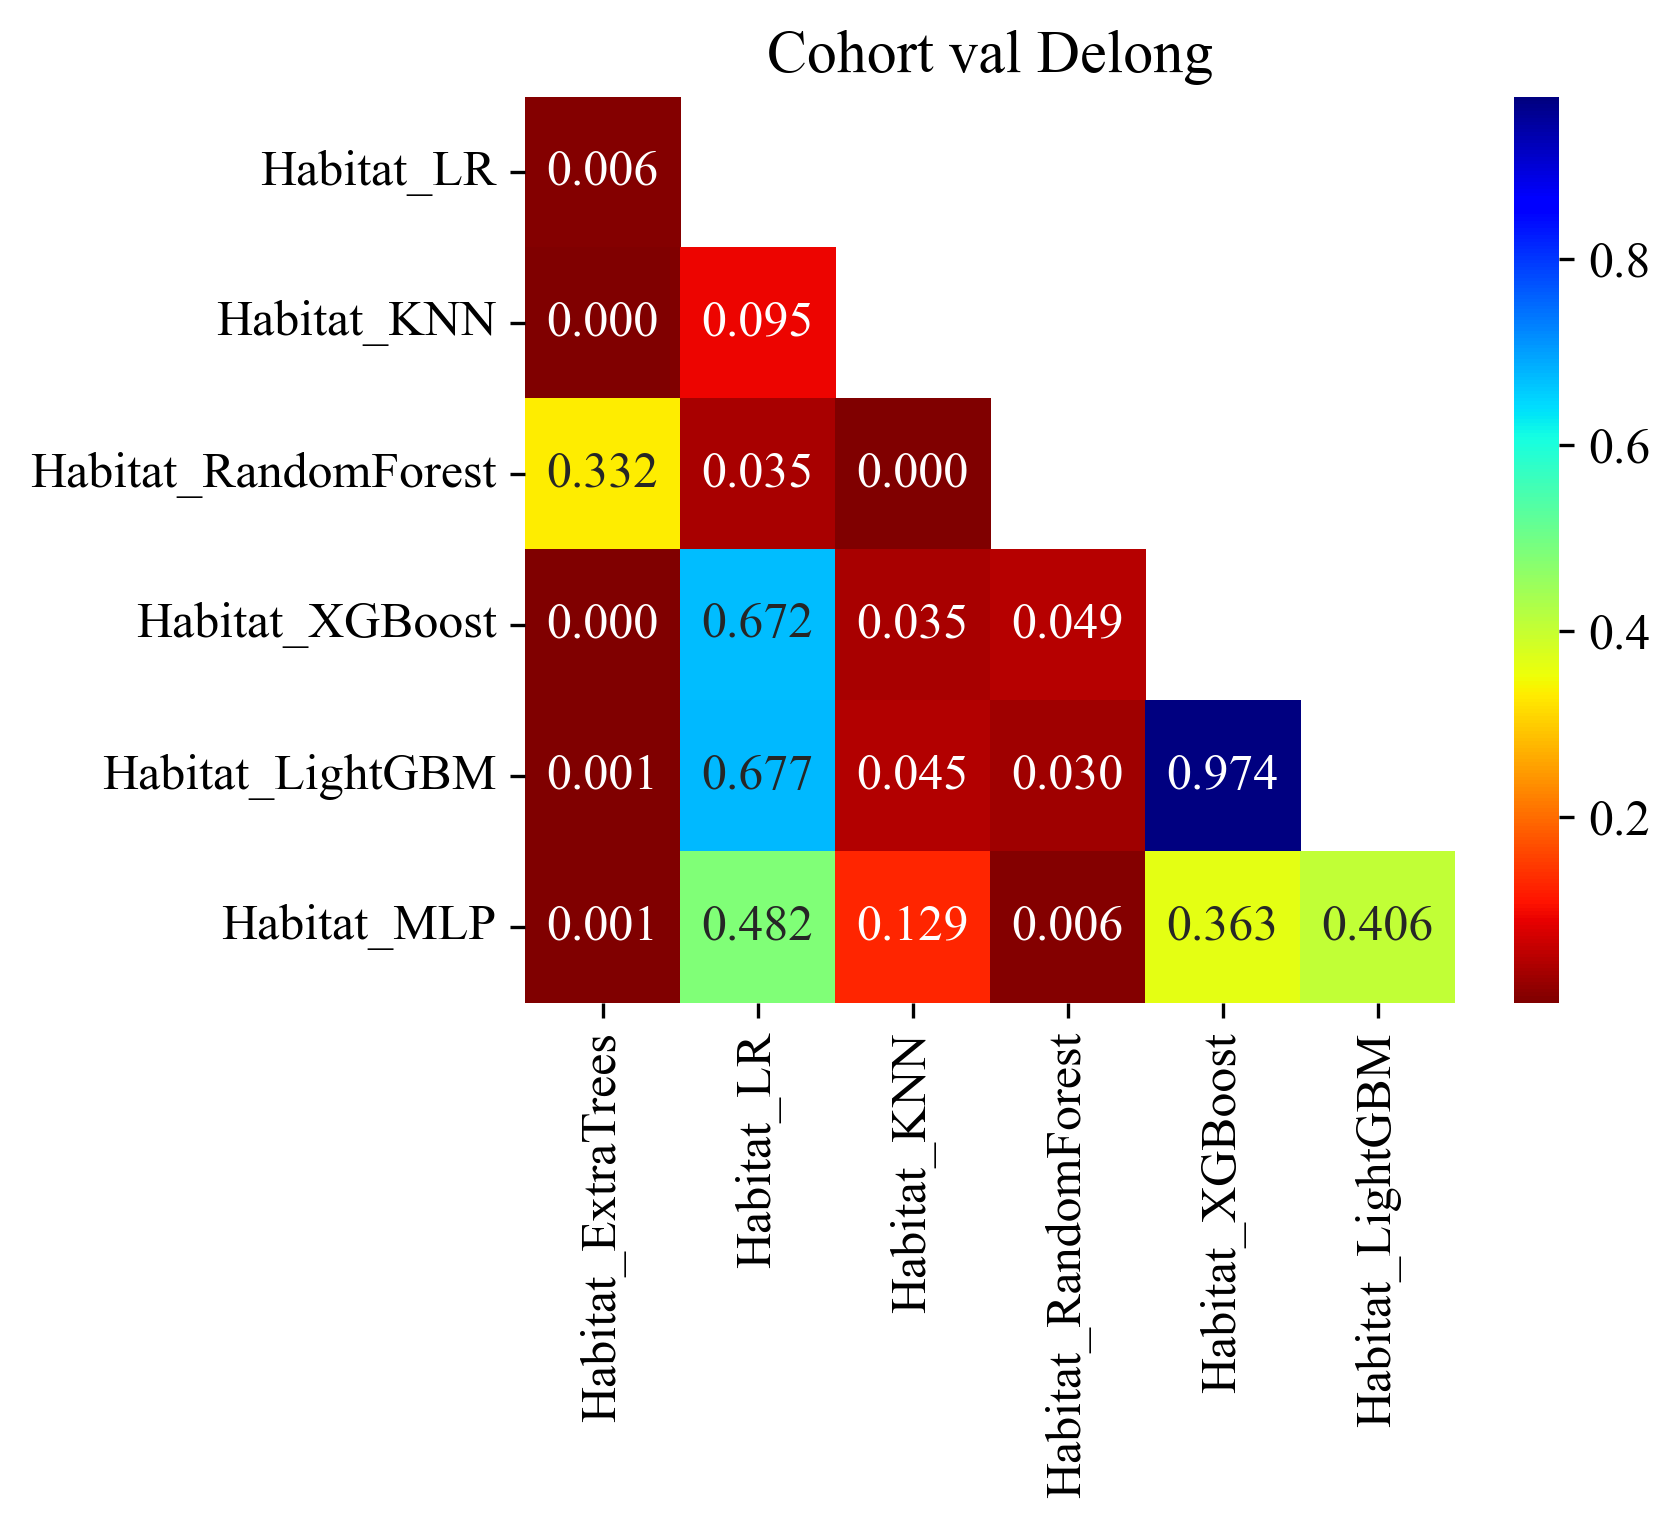

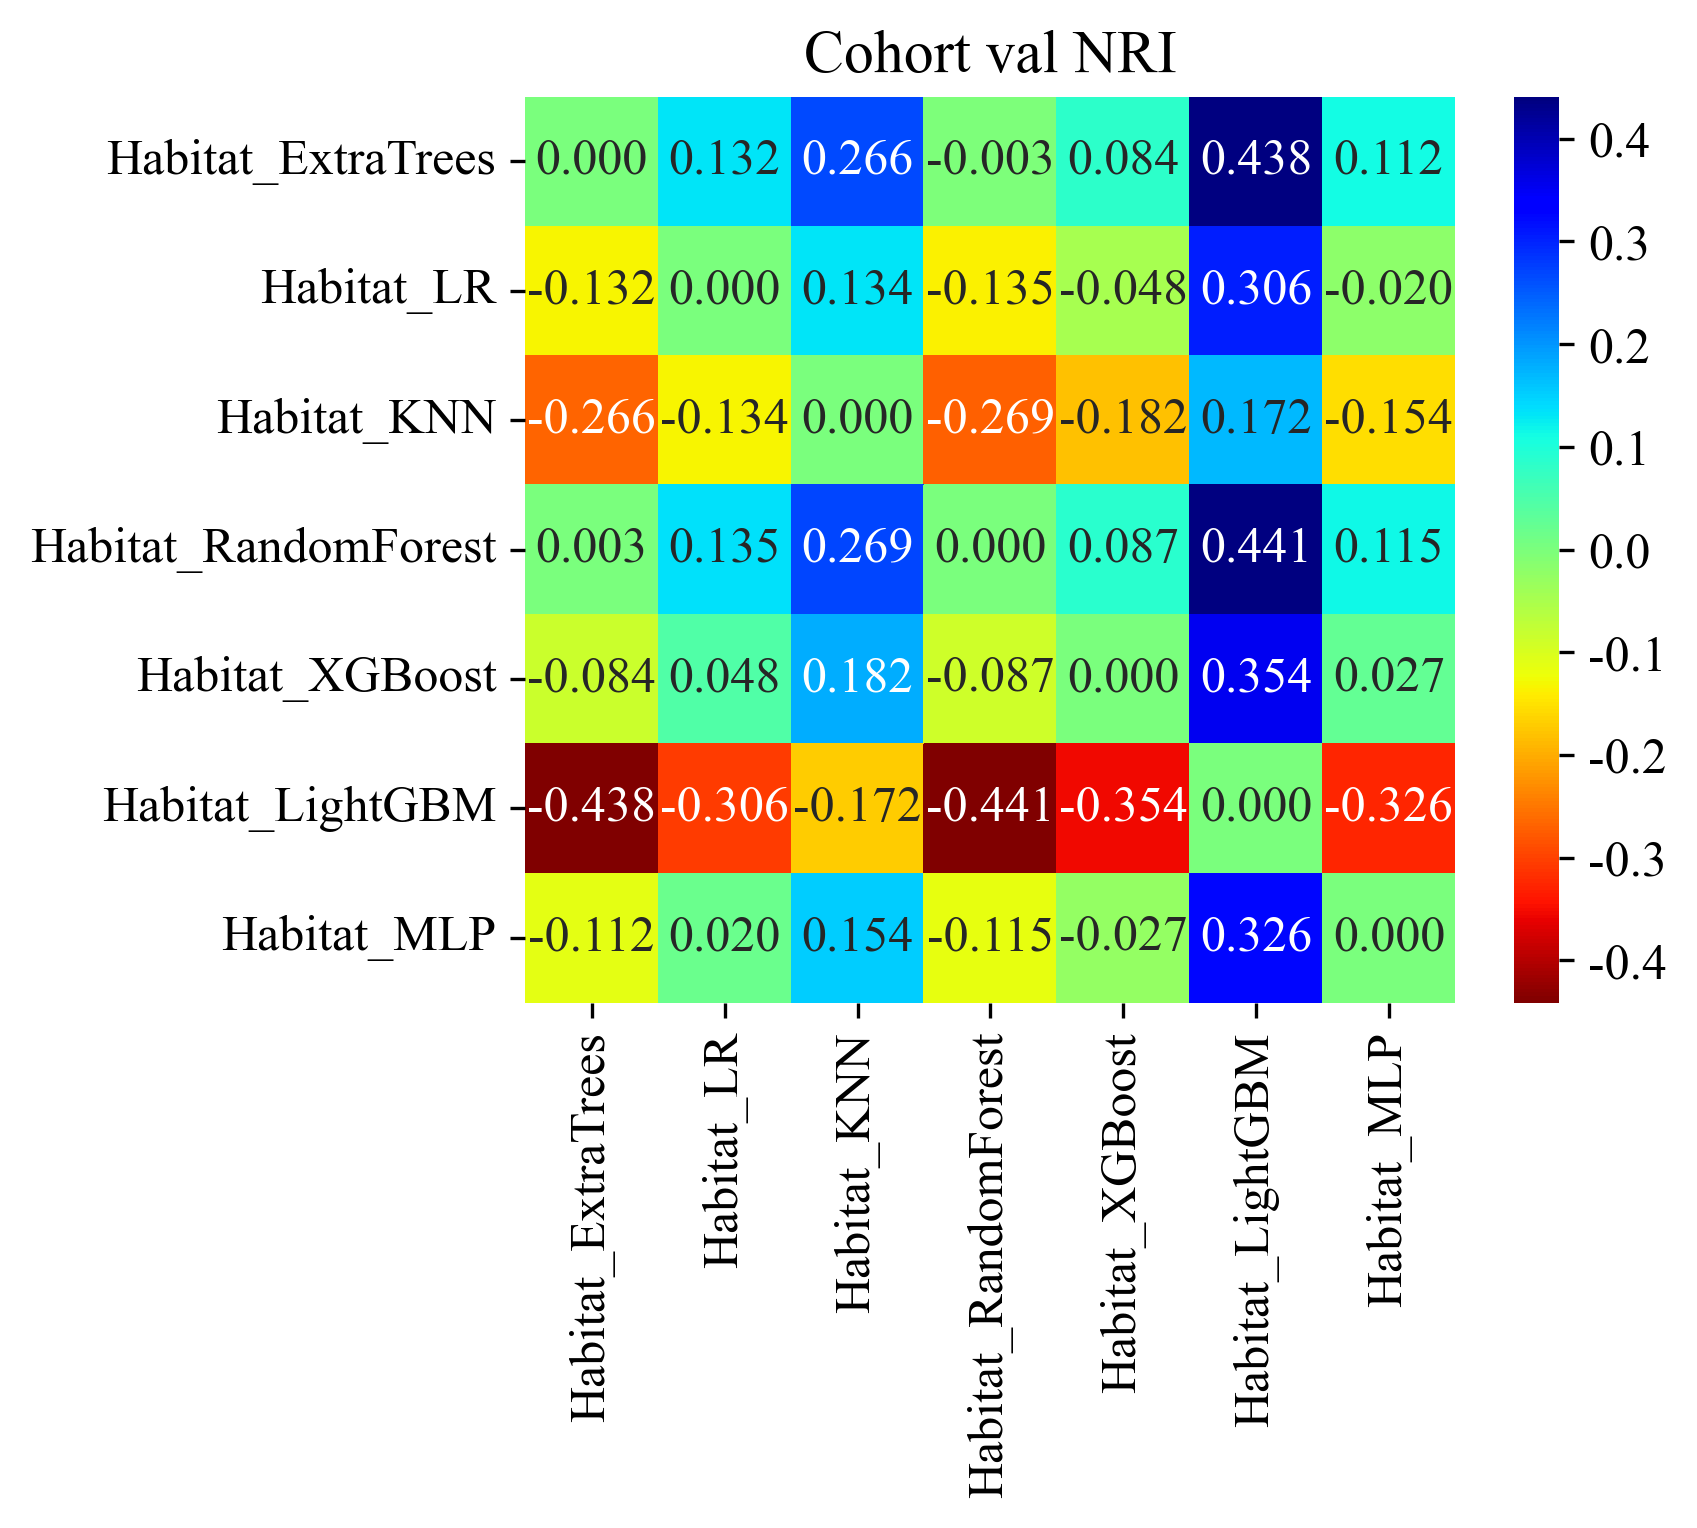

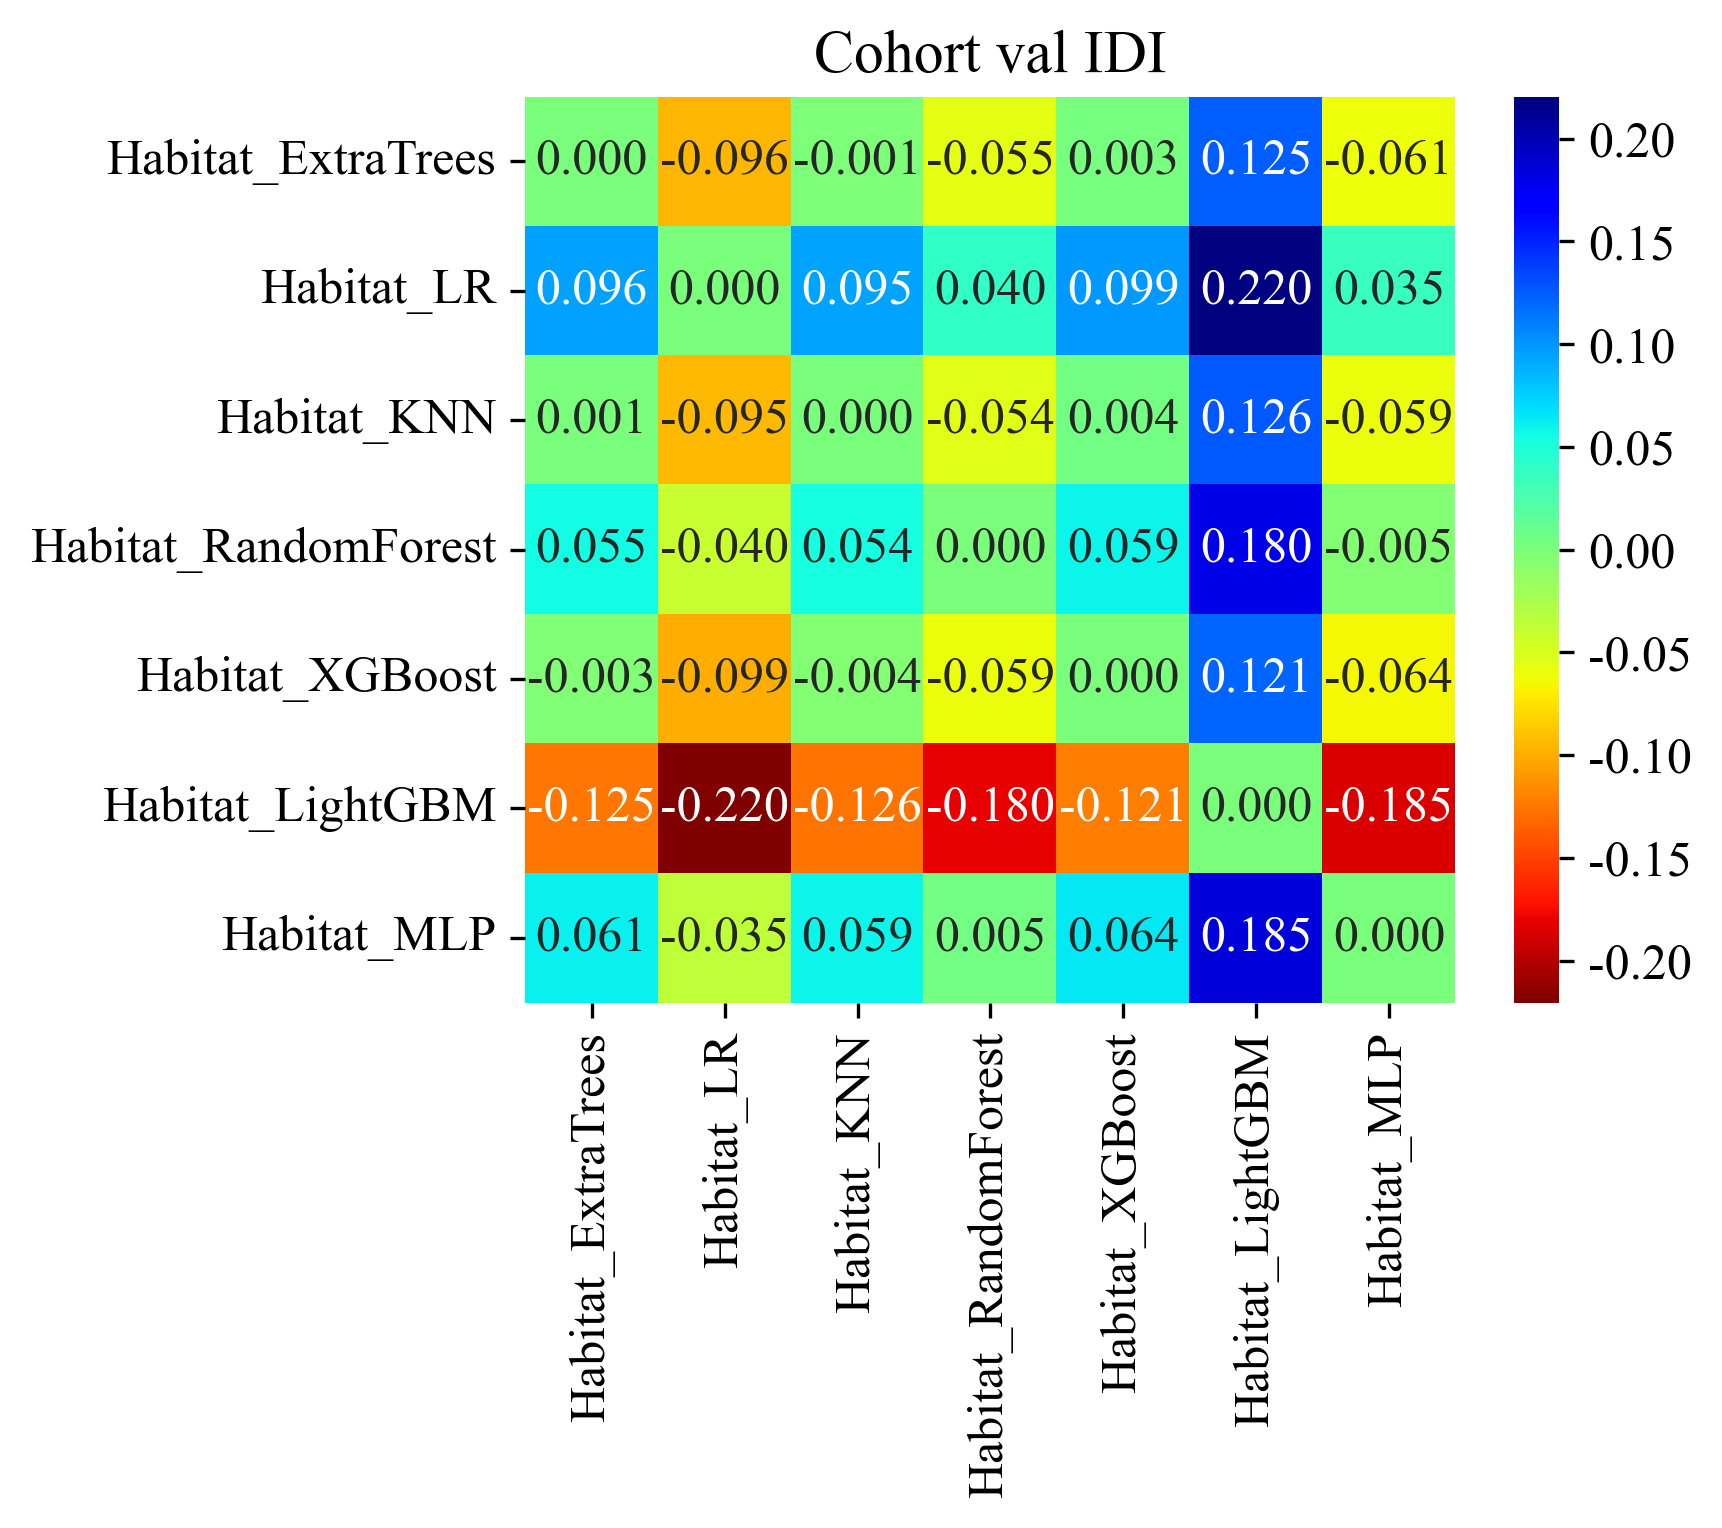

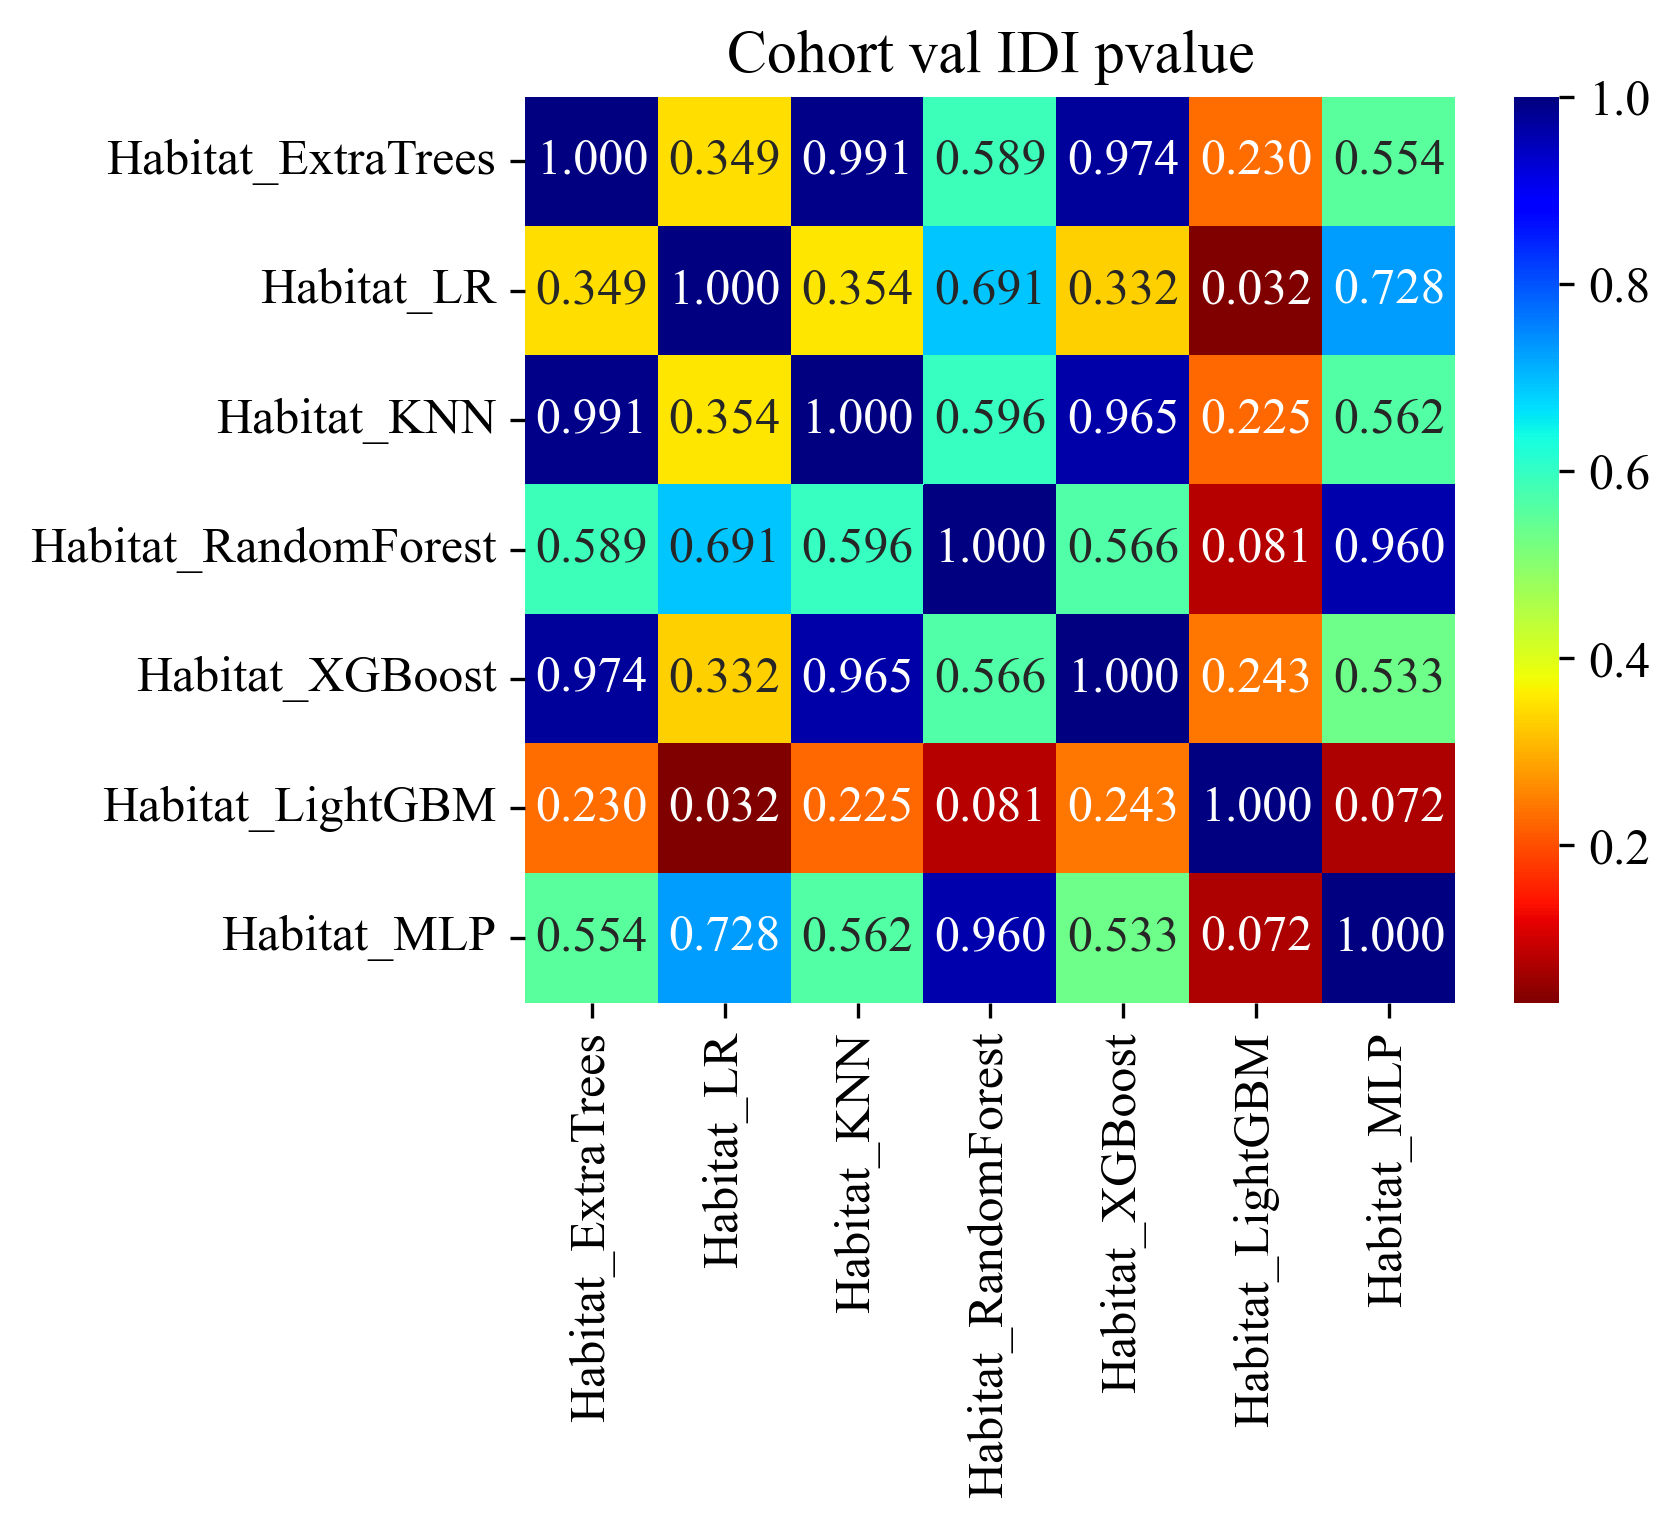

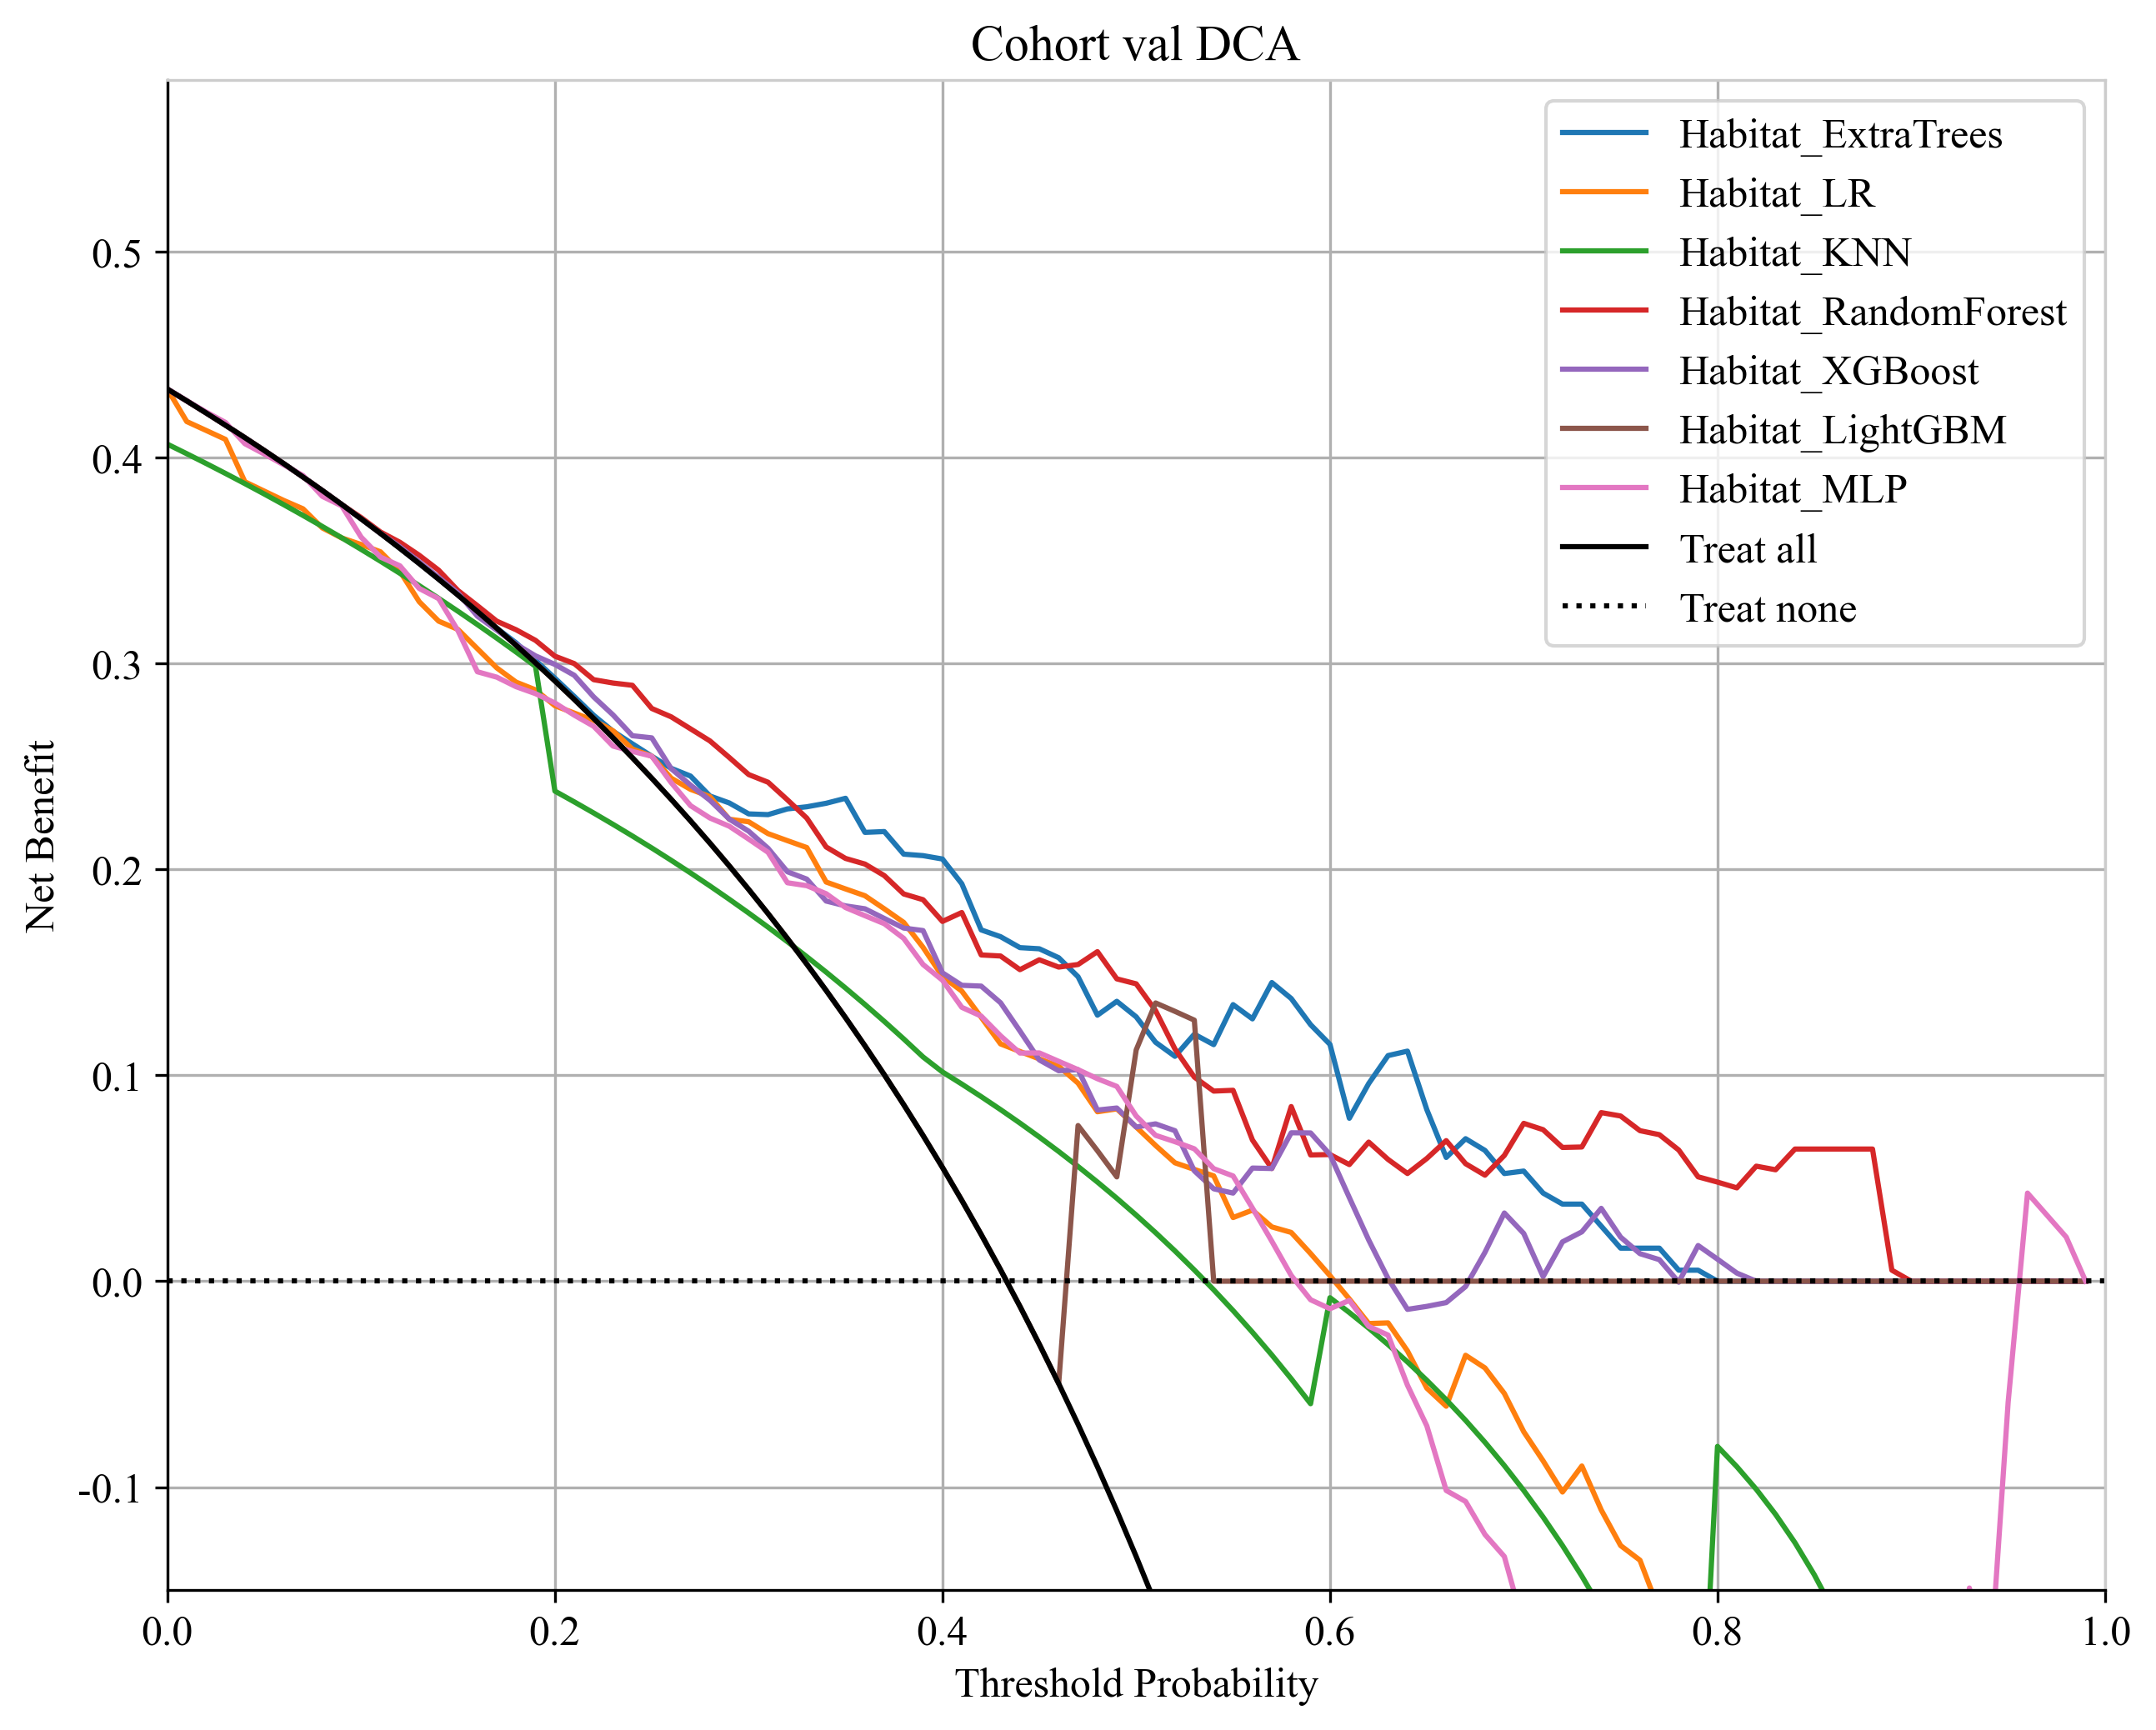

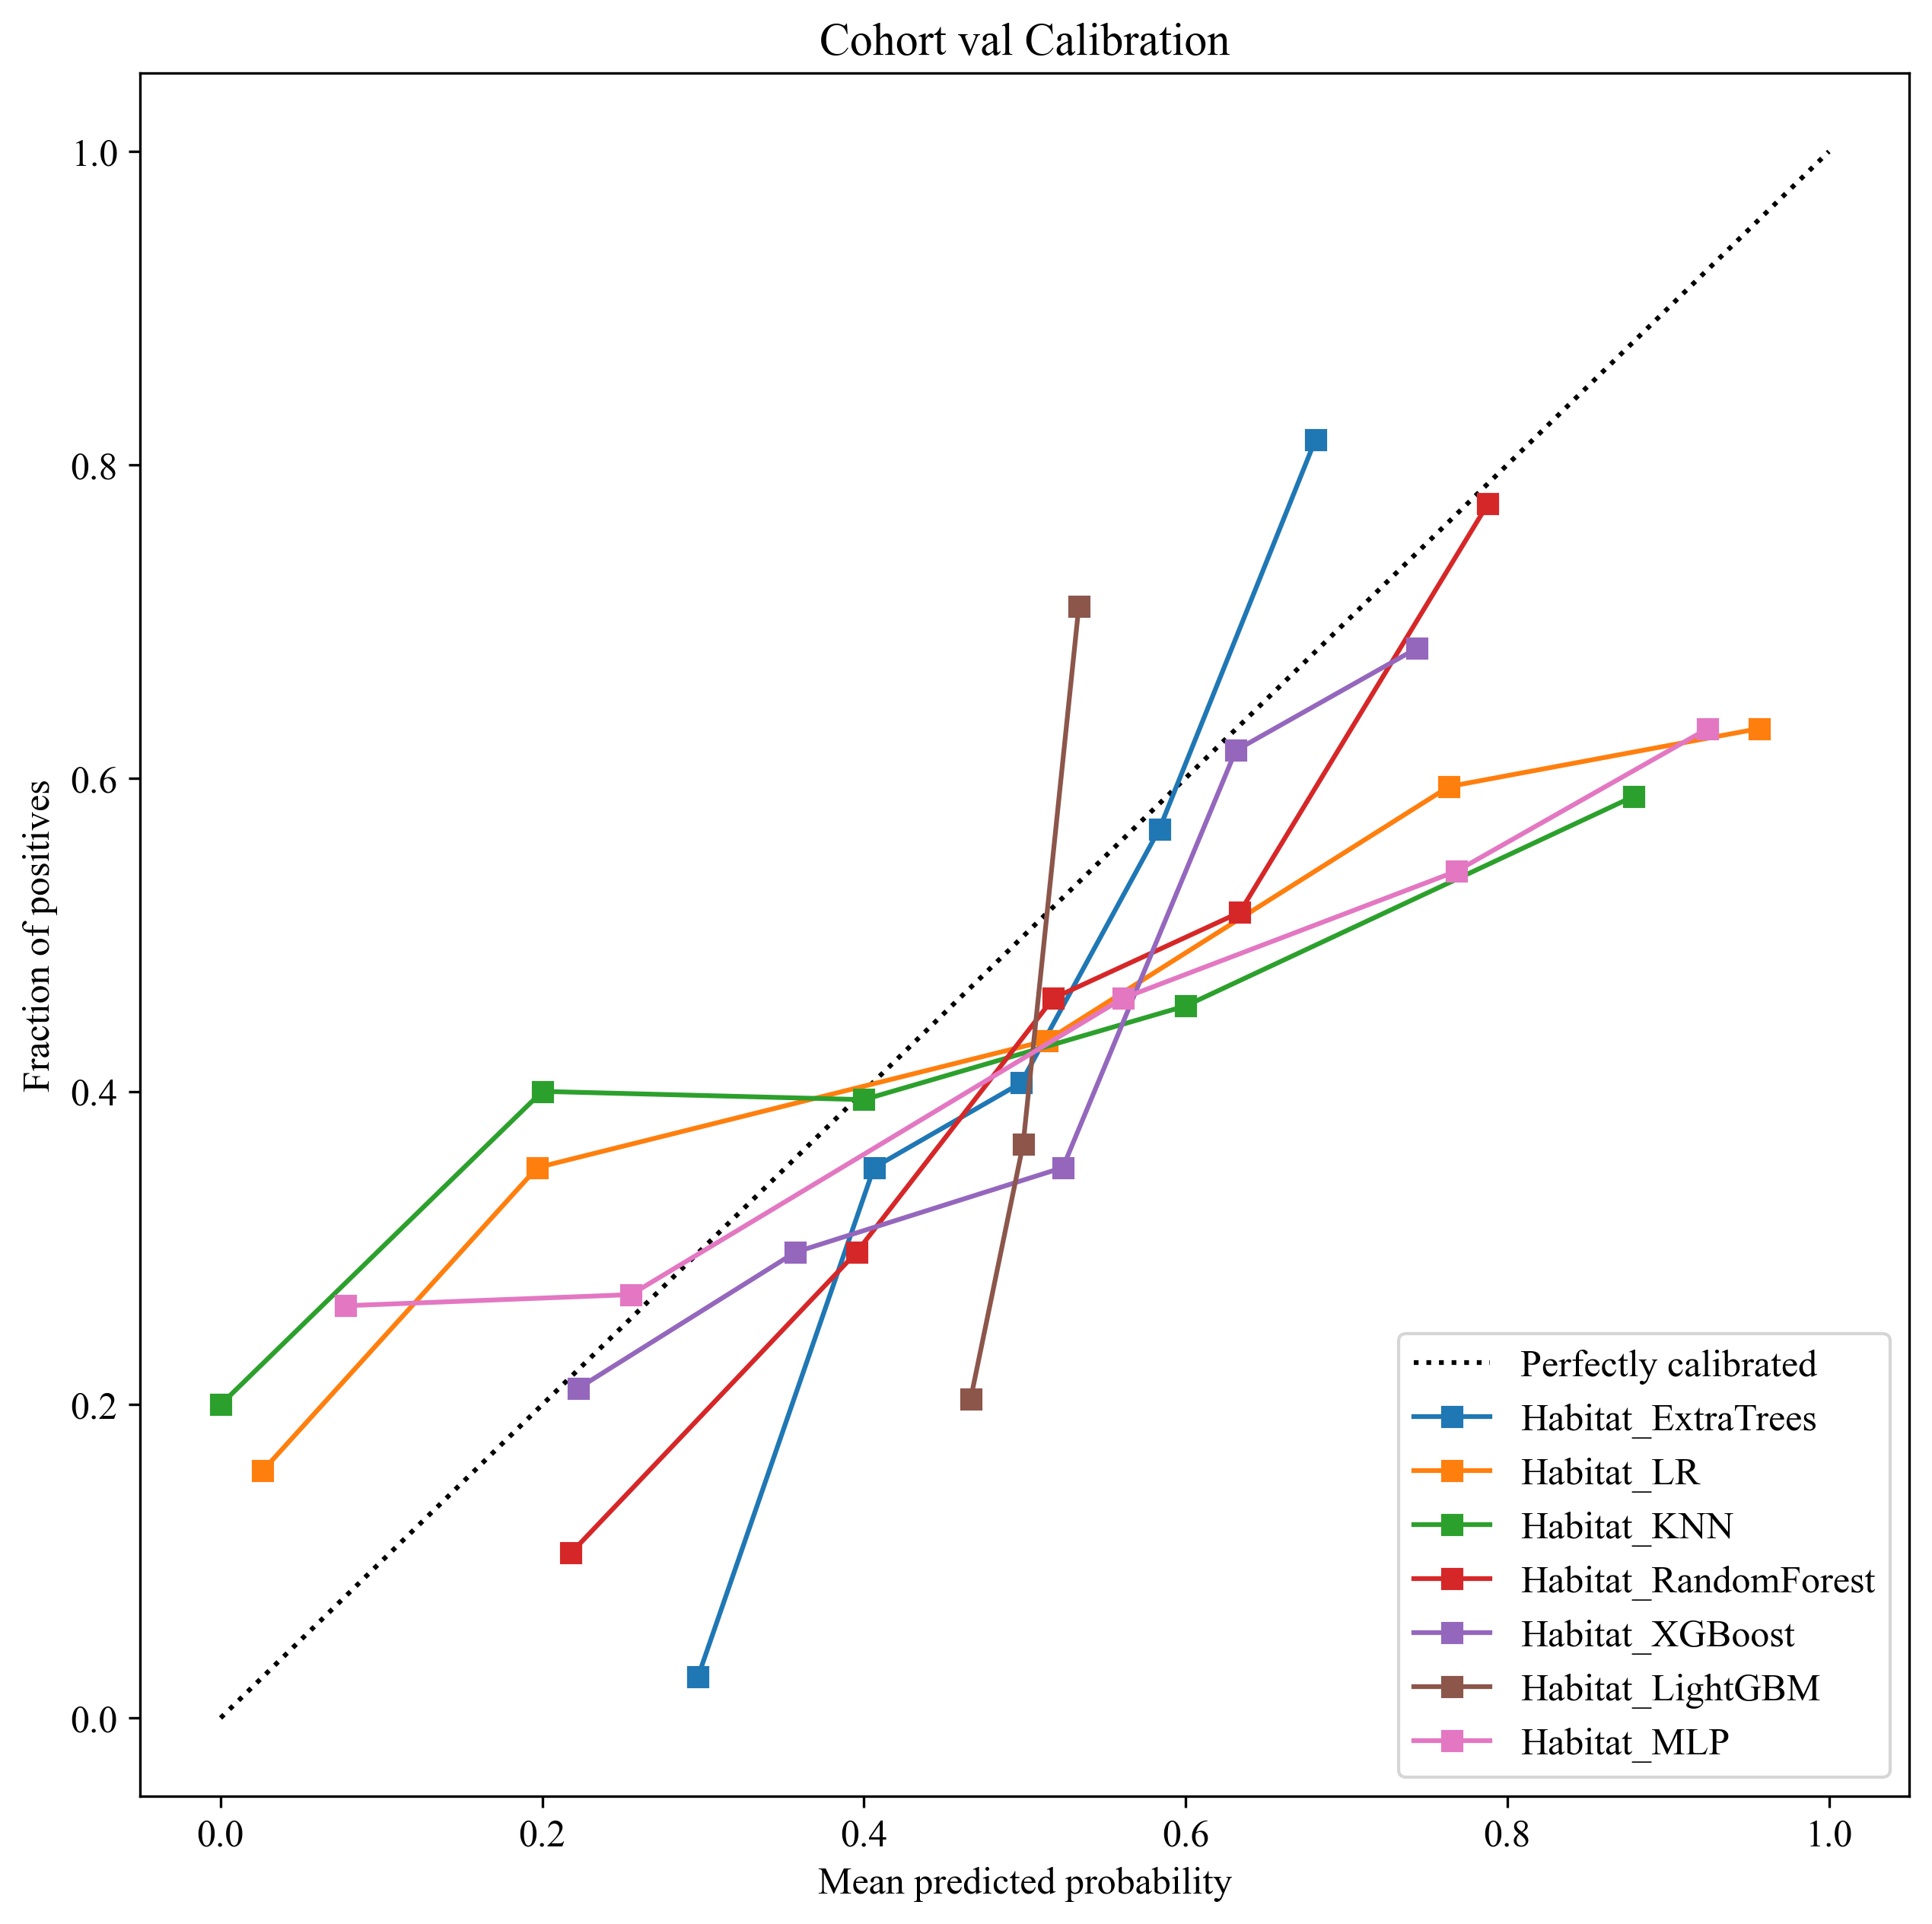

ID   -0_x  Habitat_ExtraTrees   -0_y  Habitat_LR  -0_x  \
0    1219.nii.gz  0.275               0.725  0.167       0.833   0.0   
1    1221.nii.gz  0.325               0.675  0.245       0.755   0.2   
2    1222.nii.gz  0.493               0.507  0.737       0.263   0.6   
3    1223.nii.gz  0.453               0.547  0.412       0.588   0.8   
4    1224.nii.gz  0.575               0.425  0.715       0.285   1.0   
..           ...    ...                 ...    ...         ...   ...   
126  1411.nii.gz  0.629               0.371  0.234       0.766   0.8   
127  1412.nii.gz  0.387               0.613  0.174       0.826   0.8   
128  1413.nii.gz  0.725               0.275  0.012       0.988   0.4   
129  1414.nii.gz  0.362               0.638  0.291       0.709   0.4   
130  1415.nii.gz  0.333               0.667  0.067       0.933   0.2   

     Habitat_KNN   -0_y  Habitat_RandomForest   -0_x  Habitat_XGBoost   -0_y  \
0            1.0  0.350                 0.650  0.290            0.710  0.466   
1            0.8  0.163                 0.837  0.161            0.839  0.466   
2            0.4  0.612                 0.388  0.516            0.484  0.501   
3            0.2  0.612                 0.388  0.548            0.452  0.501   
4            0.0  0.887                 0.113  0.759            0.241  0.501   
..           ...    ...                   ...    ...              ...    ...   
126          0.2  0.695                 0.305  0.787            0.213  0.534   
127          0.2  0.313                 0.687  0.197            0.803  0.466   
128          0.6  0.880                 0.120  0.803            0.197  0.534   
129          0.6  0.187                 0.813  0.440            0.560  0.466   
130          0.8  0.455                 0.545  0.290            0.710  0.466   

     Habitat_LightGBM     -0  Habitat_MLP  location group  label  
0               0.534  0.084        0.916         2  test      1  
1               0.534  0.091        0.909         1  test      1  
2               0.499  0.907        0.093         2  test      1  
3               0.499  0.516        0.484         2  test      1  
4               0.499  0.857        0.143         2  test      0  
..                ...    ...          ...       ...   ...    ...  
126             0.466  0.260        0.740         1  test      0  
127             0.534  0.163        0.837         2  test      1  
128             0.466  0.880        0.120         2  test      0  
129             0.534  0.325        0.675         1  test      0  
130             0.534  0.031        0.969         1  test      1  

[131 rows x 18 columns]

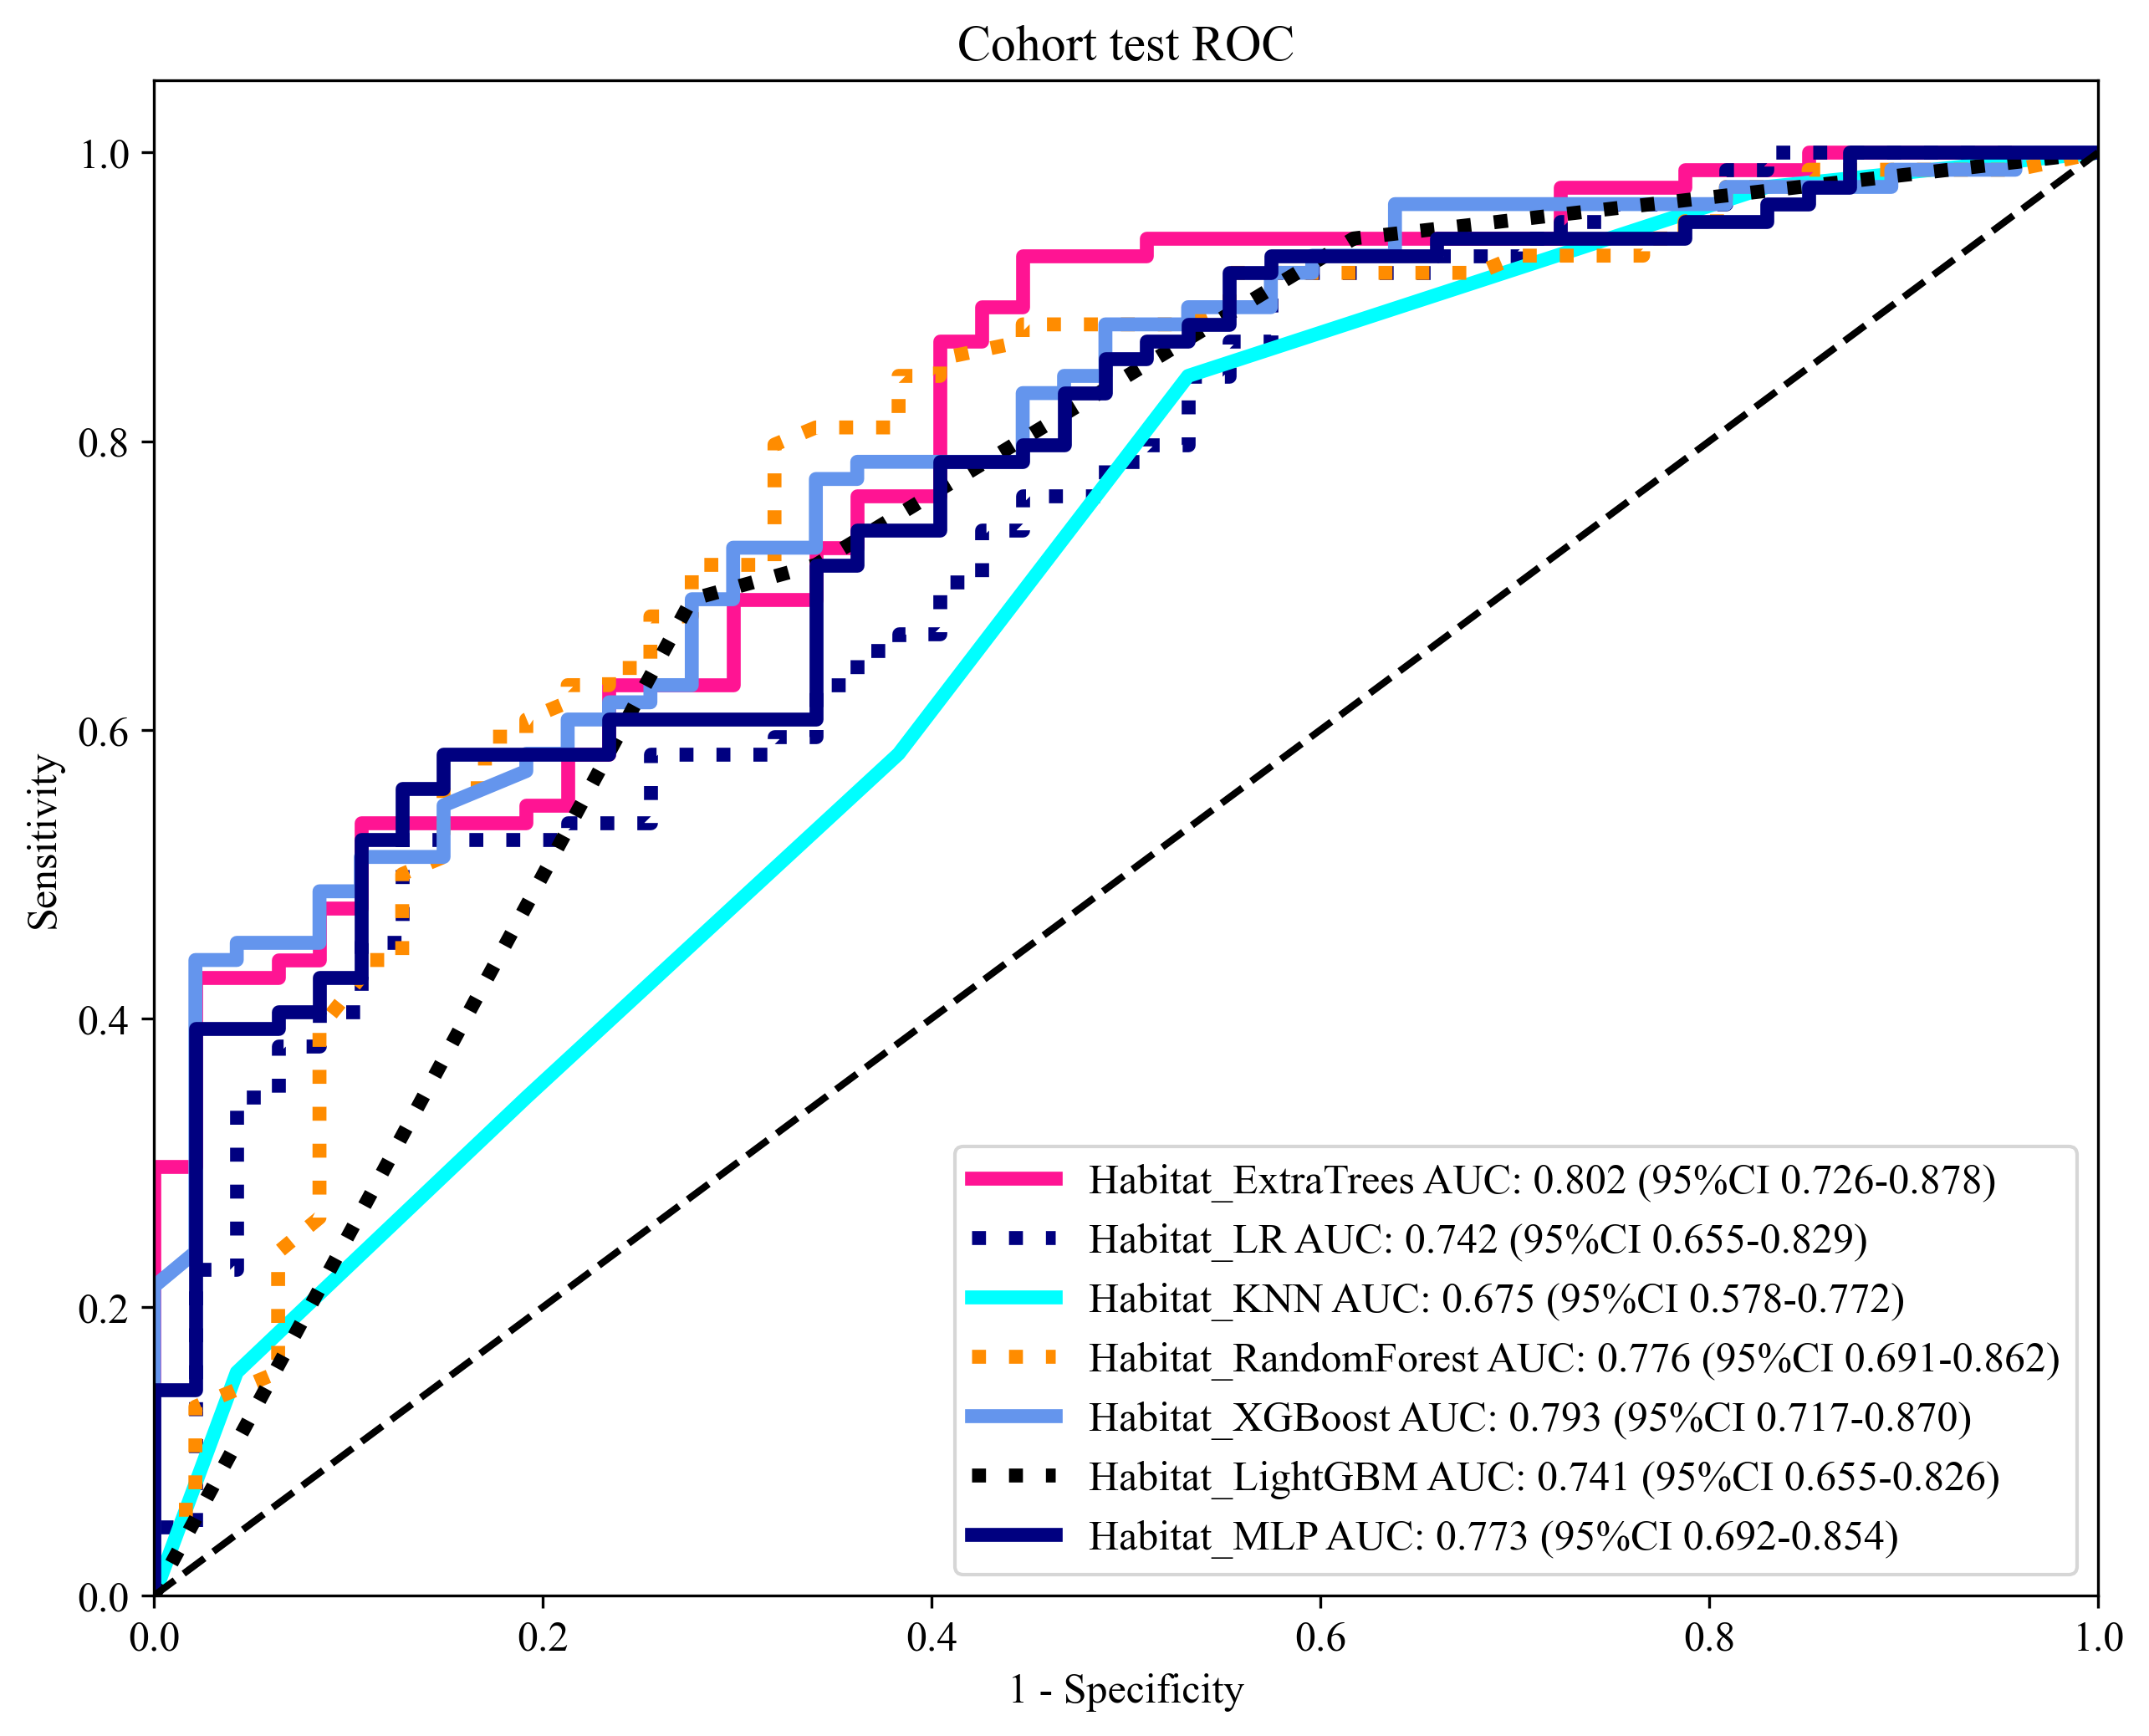

Signature  Accuracy    AUC           95% CI  Sensitivity  \
0     Habitat_ExtraTrees     0.814  0.895  0.8663 - 0.9228        0.792   
1             Habitat_LR     0.824  0.908  0.8814 - 0.9336        0.833   
2            Habitat_KNN     0.828  0.897  0.8695 - 0.9244        0.801   
3   Habitat_RandomForest     0.762  0.819  0.7805 - 0.8579        0.751   
4        Habitat_XGBoost     0.851  0.922  0.8979 - 0.9460        0.928   
5       Habitat_LightGBM     0.658  0.712  0.6670 - 0.7577        0.507   
6            Habitat_MLP     0.880  0.943  0.9229 - 0.9621        0.900   
7     Habitat_ExtraTrees     0.738  0.803  0.7422 - 0.8641        0.630   
8             Habitat_LR     0.642  0.697  0.6219 - 0.7725        0.790   
9            Habitat_KNN     0.599  0.633  0.5539 - 0.7112        0.556   
10  Habitat_RandomForest     0.717  0.777  0.7116 - 0.8429        0.802   
11       Habitat_XGBoost     0.695  0.714  0.6403 - 0.7886        0.593   
12      Habitat_LightGBM     0.706  0.715  0.6450 - 0.7858        0.543   
13           Habitat_MLP     0.663  0.683  0.6062 - 0.7588        0.716   
14    Habitat_ExtraTrees     0.794  0.802  0.7265 - 0.8784        0.929   
15            Habitat_LR     0.649  0.742  0.6554 - 0.8289        0.524   
16           Habitat_KNN     0.710  0.675  0.5781 - 0.7724        0.845   
17  Habitat_RandomForest     0.756  0.776  0.6907 - 0.8620        0.798   
18       Habitat_XGBoost     0.733  0.793  0.7166 - 0.8700        0.774   
19      Habitat_LightGBM     0.702  0.741  0.6554 - 0.8261        0.690   
20           Habitat_MLP     0.679  0.773  0.6922 - 0.8539        0.583   

    Specificity    PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0         0.837  0.829  0.801      0.829   0.792  0.810      0.509  train  
1         0.814  0.818  0.829      0.818   0.833  0.825      0.494  train  
2         0.855  0.847  0.811      0.847   0.801  0.823      0.600  train  
3         0.774  0.769  0.757      0.769   0.751  0.760      0.495  train  
4         0.774  0.804  0.914      0.804   0.928  0.861      0.431  train  
5         0.810  0.727  0.622      0.727   0.507  0.597      0.501  train  
6         0.860  0.865  0.896      0.865   0.900  0.882      0.471  train  
7         0.821  0.729  0.744      0.729   0.630  0.675      0.558    val  
8         0.528  0.561  0.767      0.561   0.790  0.656      0.333    val  
9         0.632  0.536  0.650      0.536   0.556  0.545      0.600    val  
10        0.651  0.637  0.812      0.637   0.802  0.710      0.487    val  
11        0.774  0.667  0.713      0.667   0.593  0.627      0.593    val  
12        0.830  0.710  0.704      0.710   0.543  0.615      0.534    val  
13        0.623  0.592  0.742      0.592   0.716  0.648      0.519    val  
14        0.553  0.788  0.812      0.788   0.929  0.852      0.455   test  
15        0.872  0.880  0.506      0.880   0.524  0.657      0.826   test  
16        0.468  0.740  0.629      0.740   0.845  0.789      0.400   test  
17        0.681  0.817  0.653      0.817   0.798  0.807      0.472   test  
18        0.660  0.802  0.620      0.802   0.774  0.788      0.539   test  
19        0.723  0.817  0.567      0.817   0.690  0.748      0.534   test  
20        0.851  0.875  0.533      0.875   0.583  0.700      0.765   test

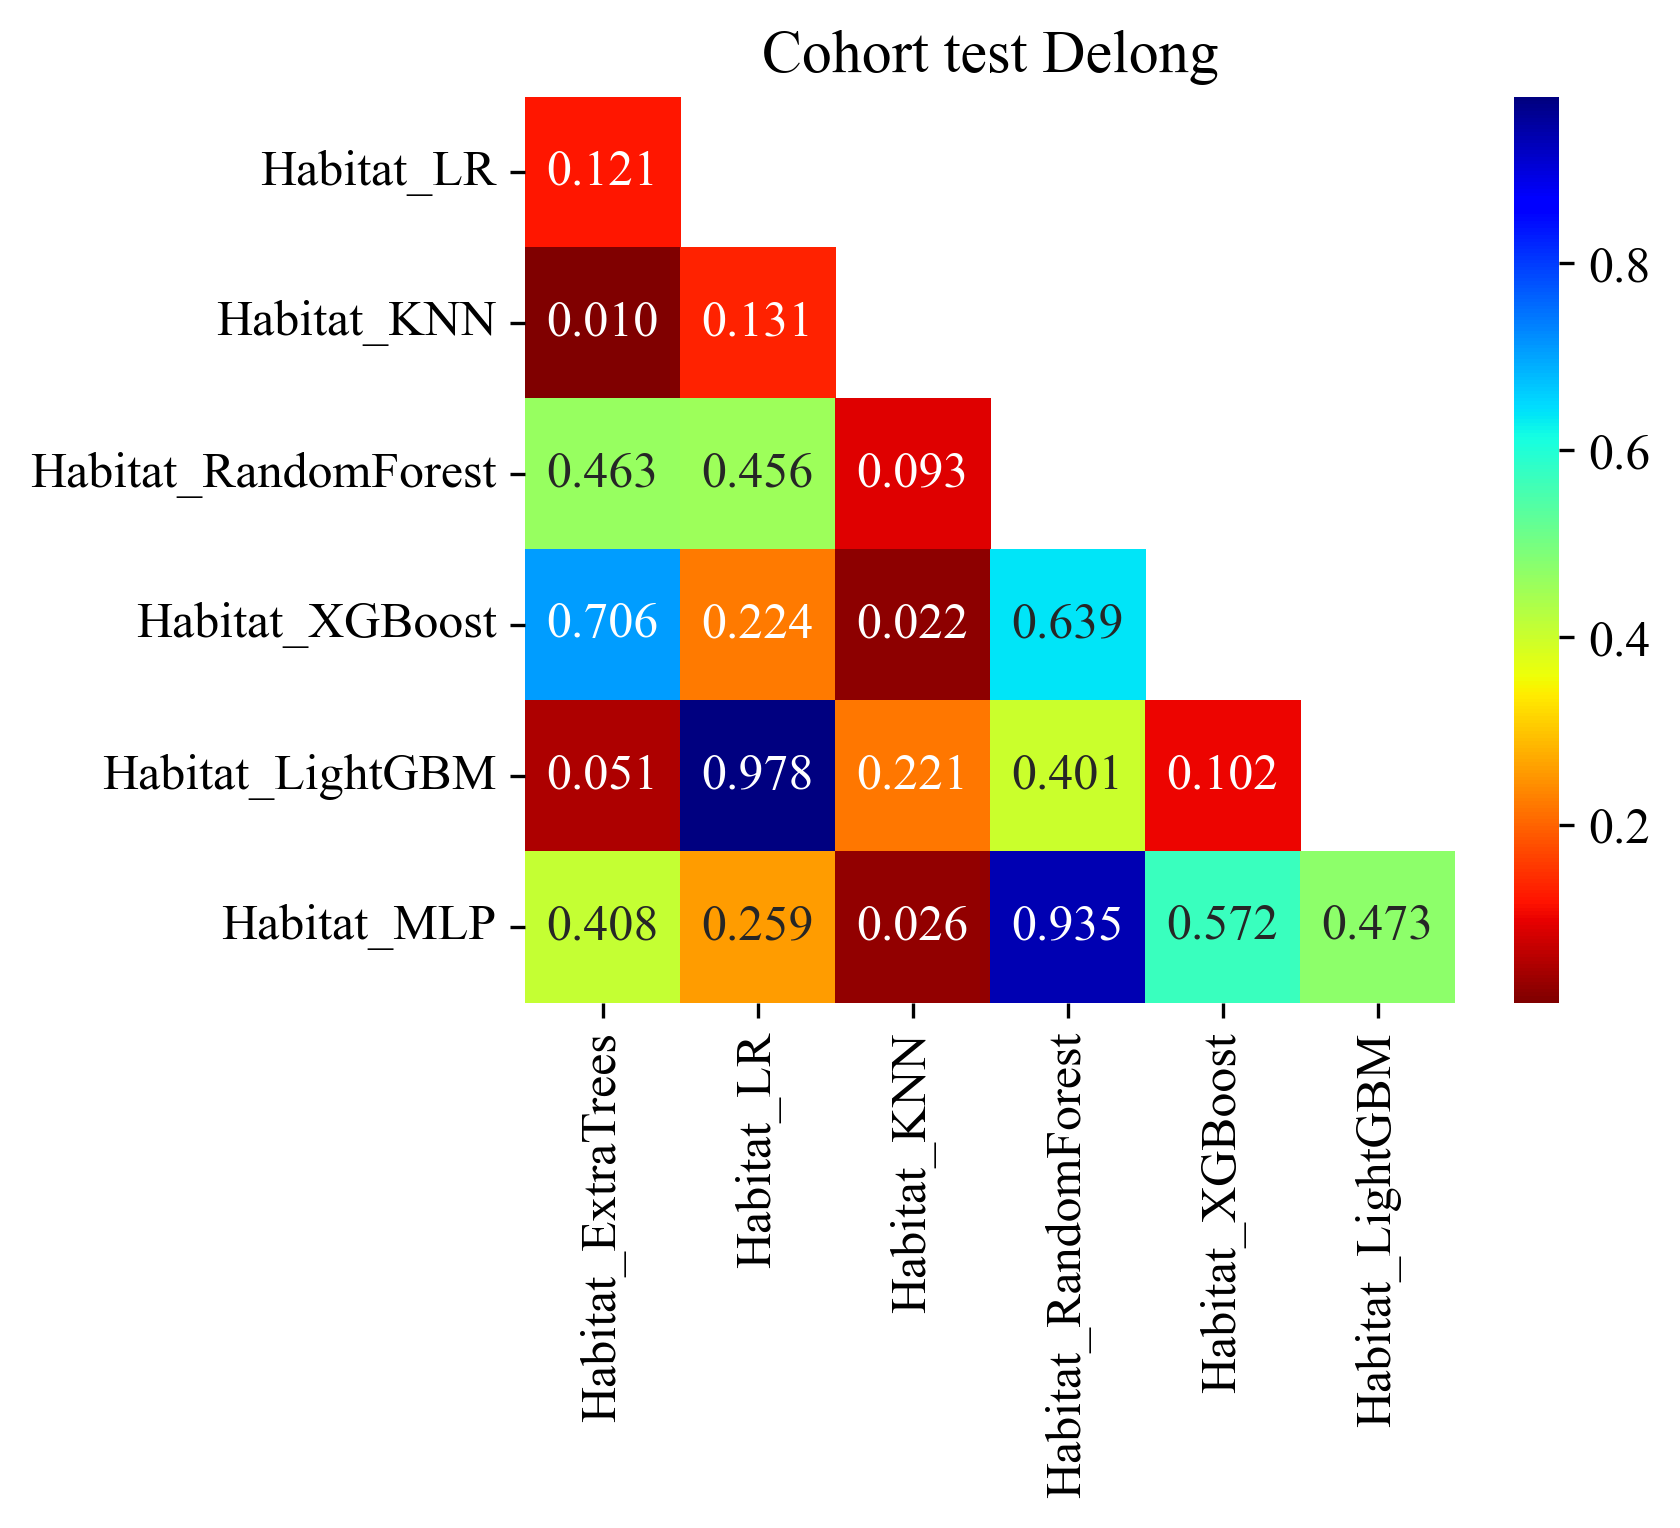

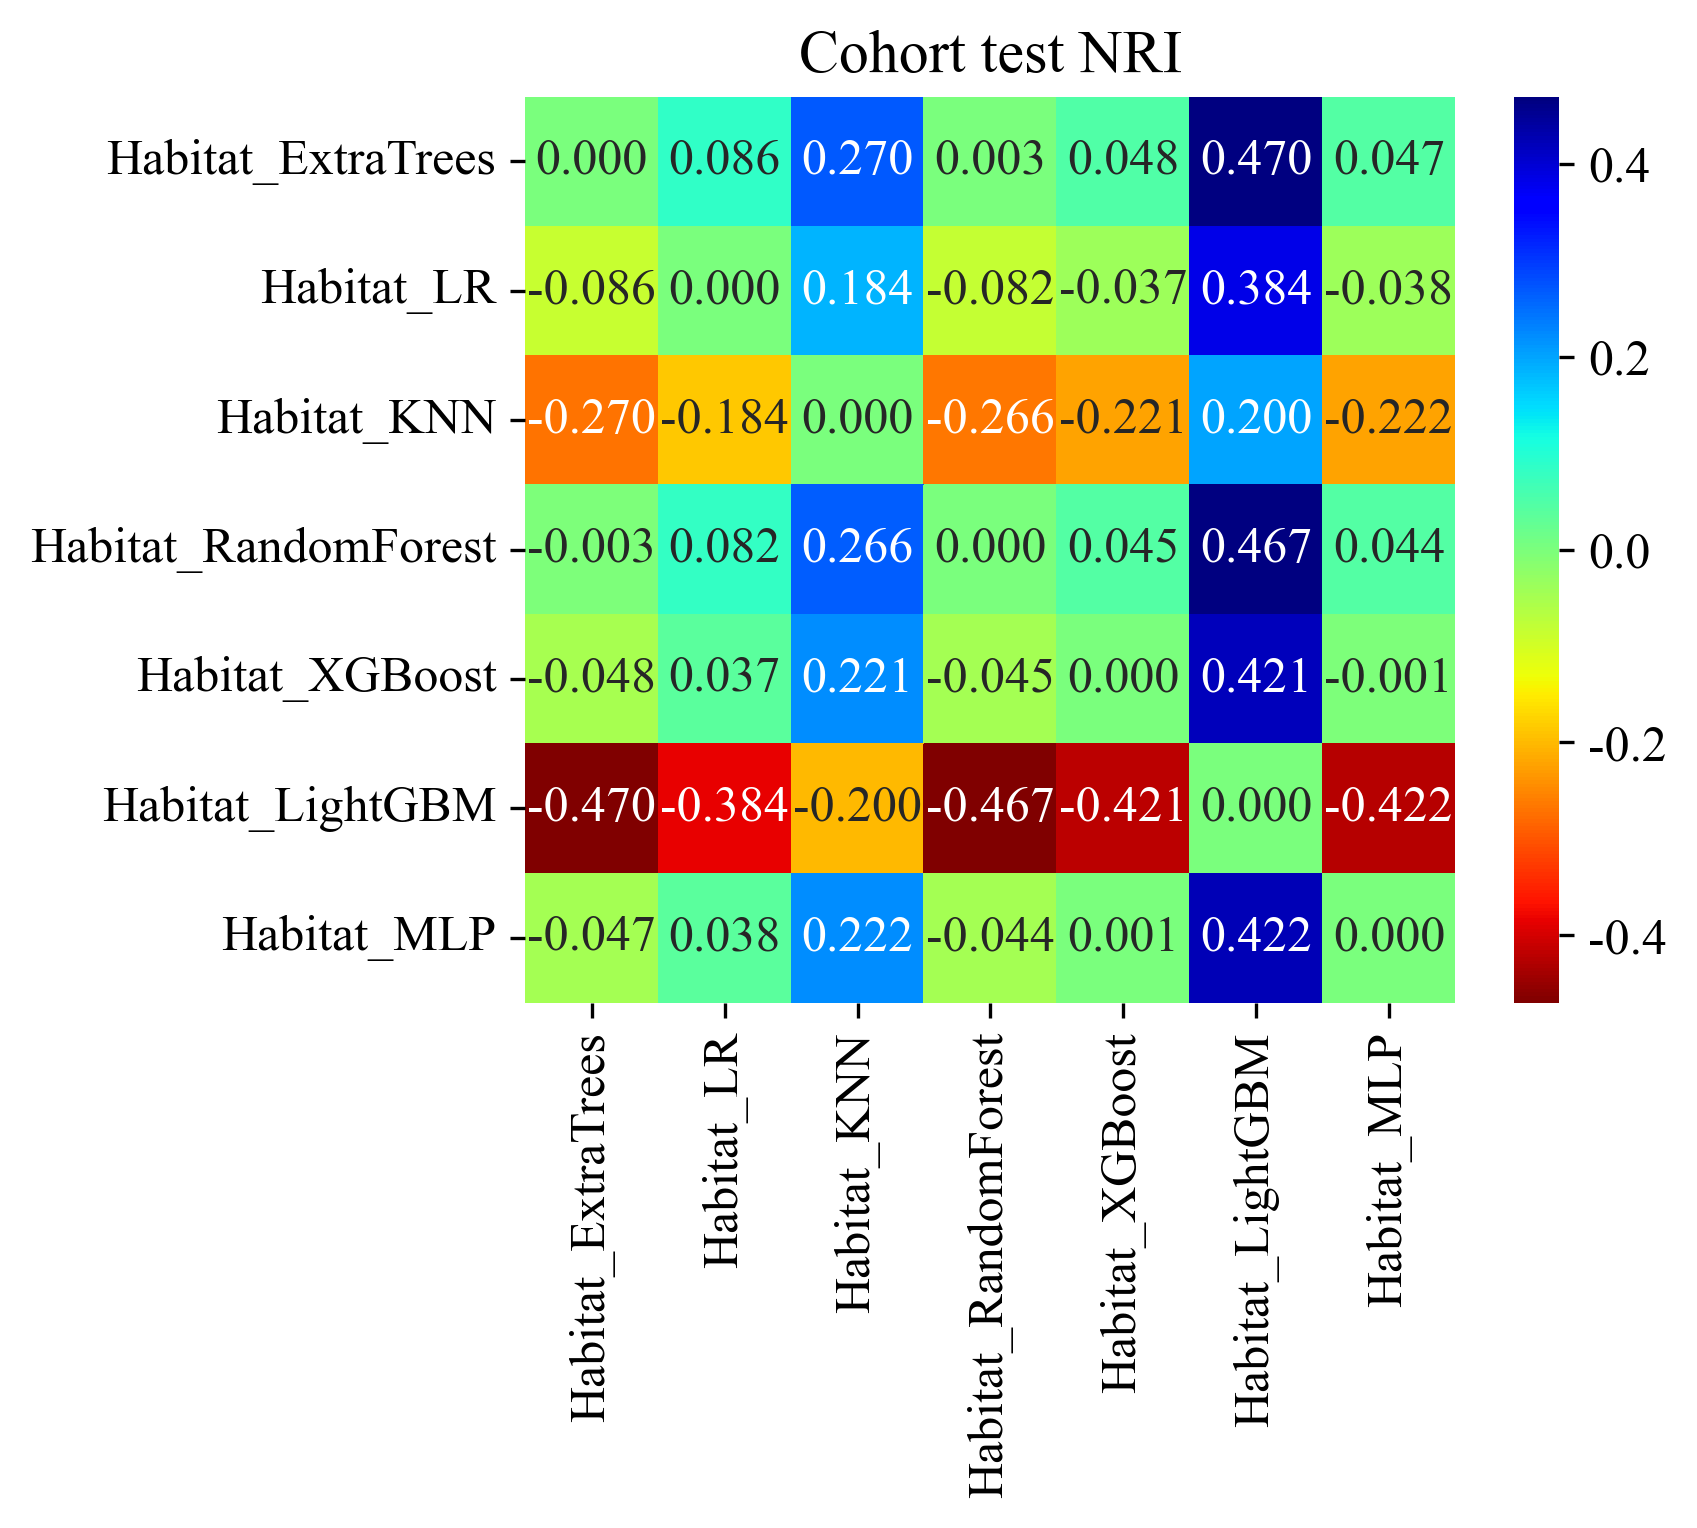

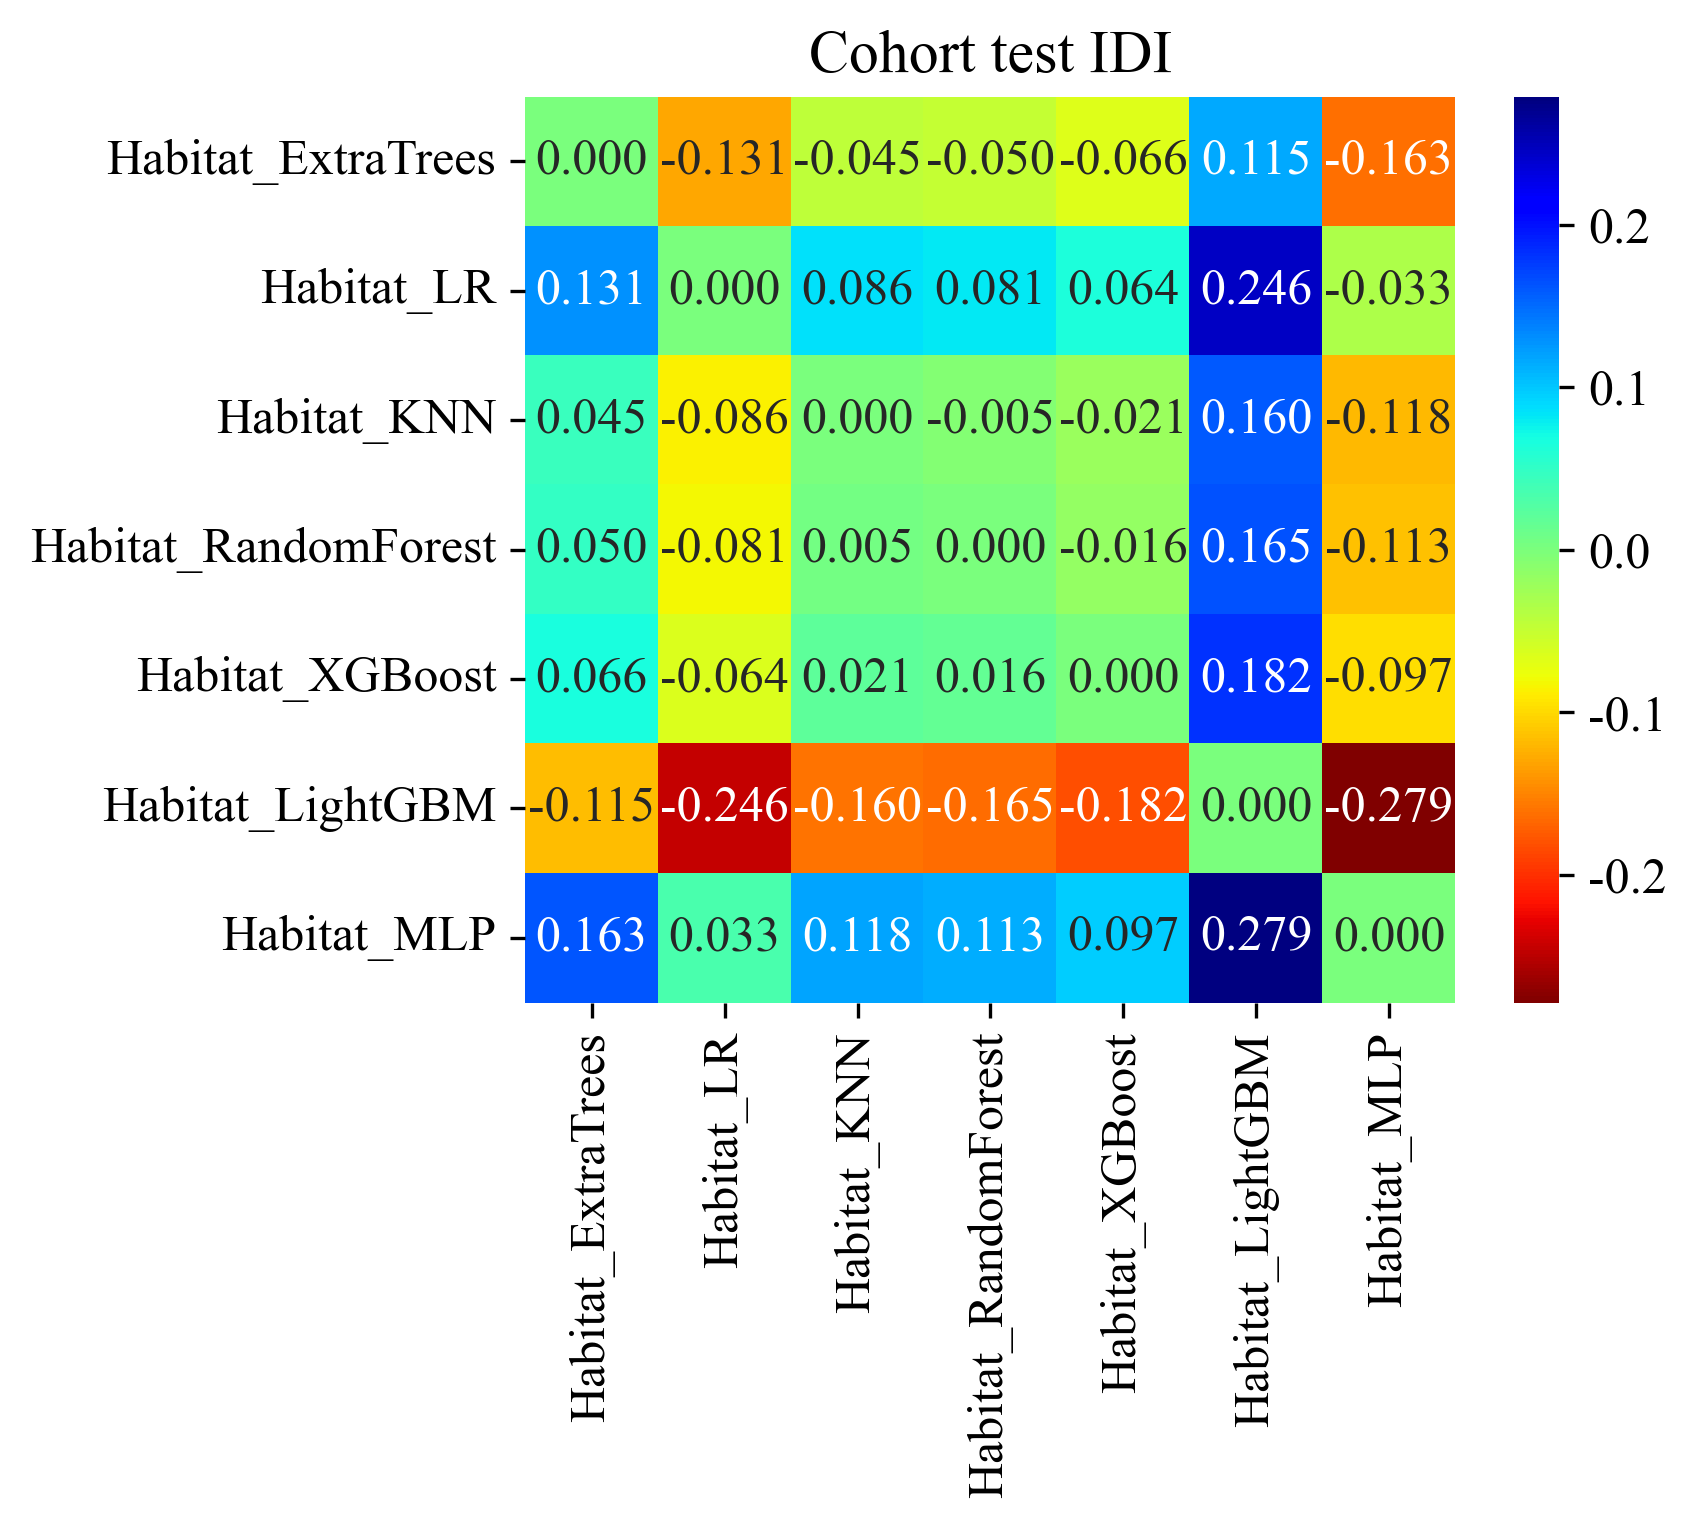

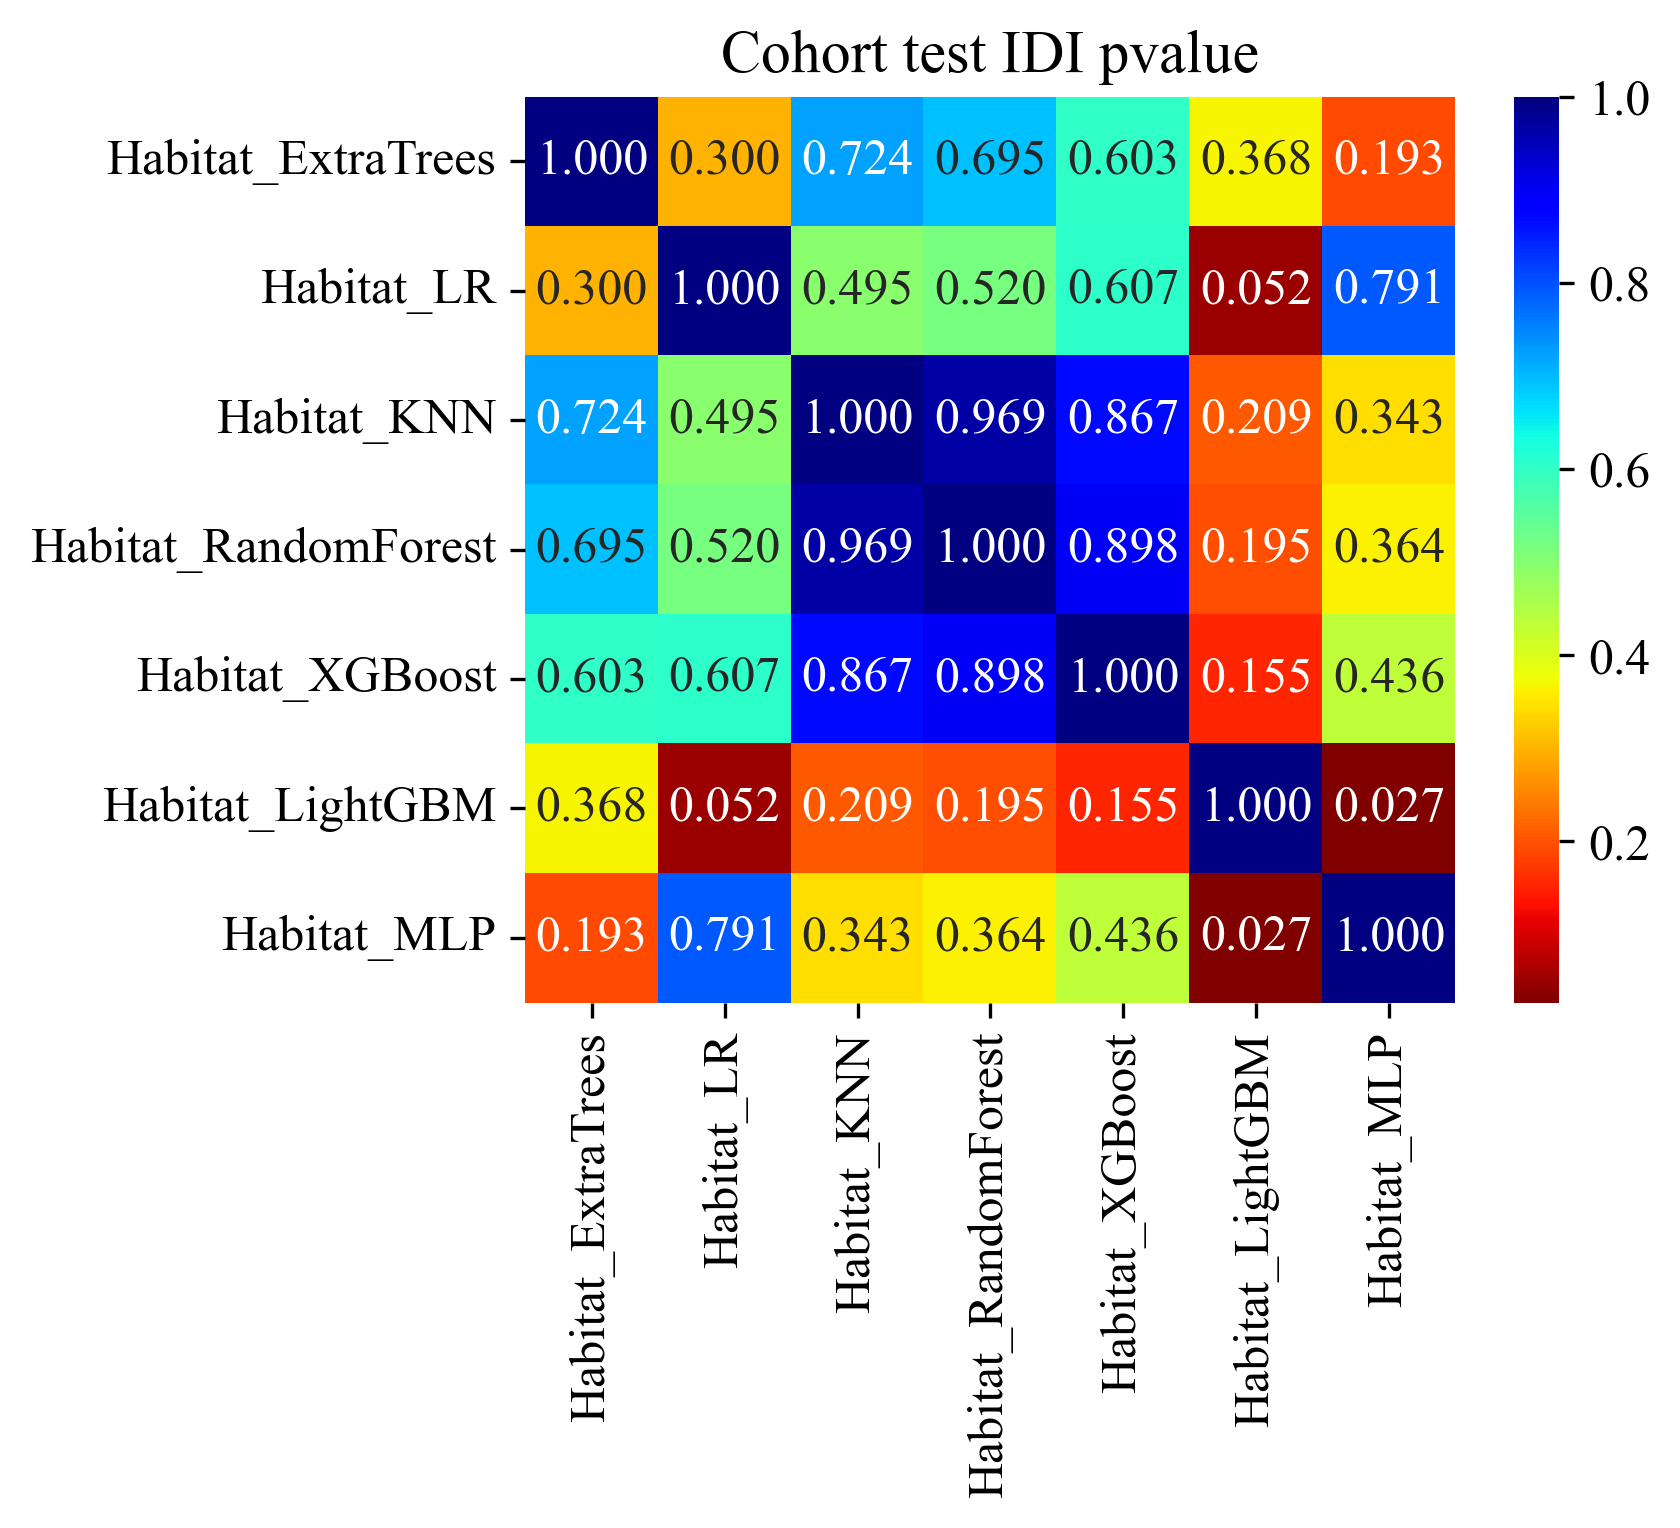

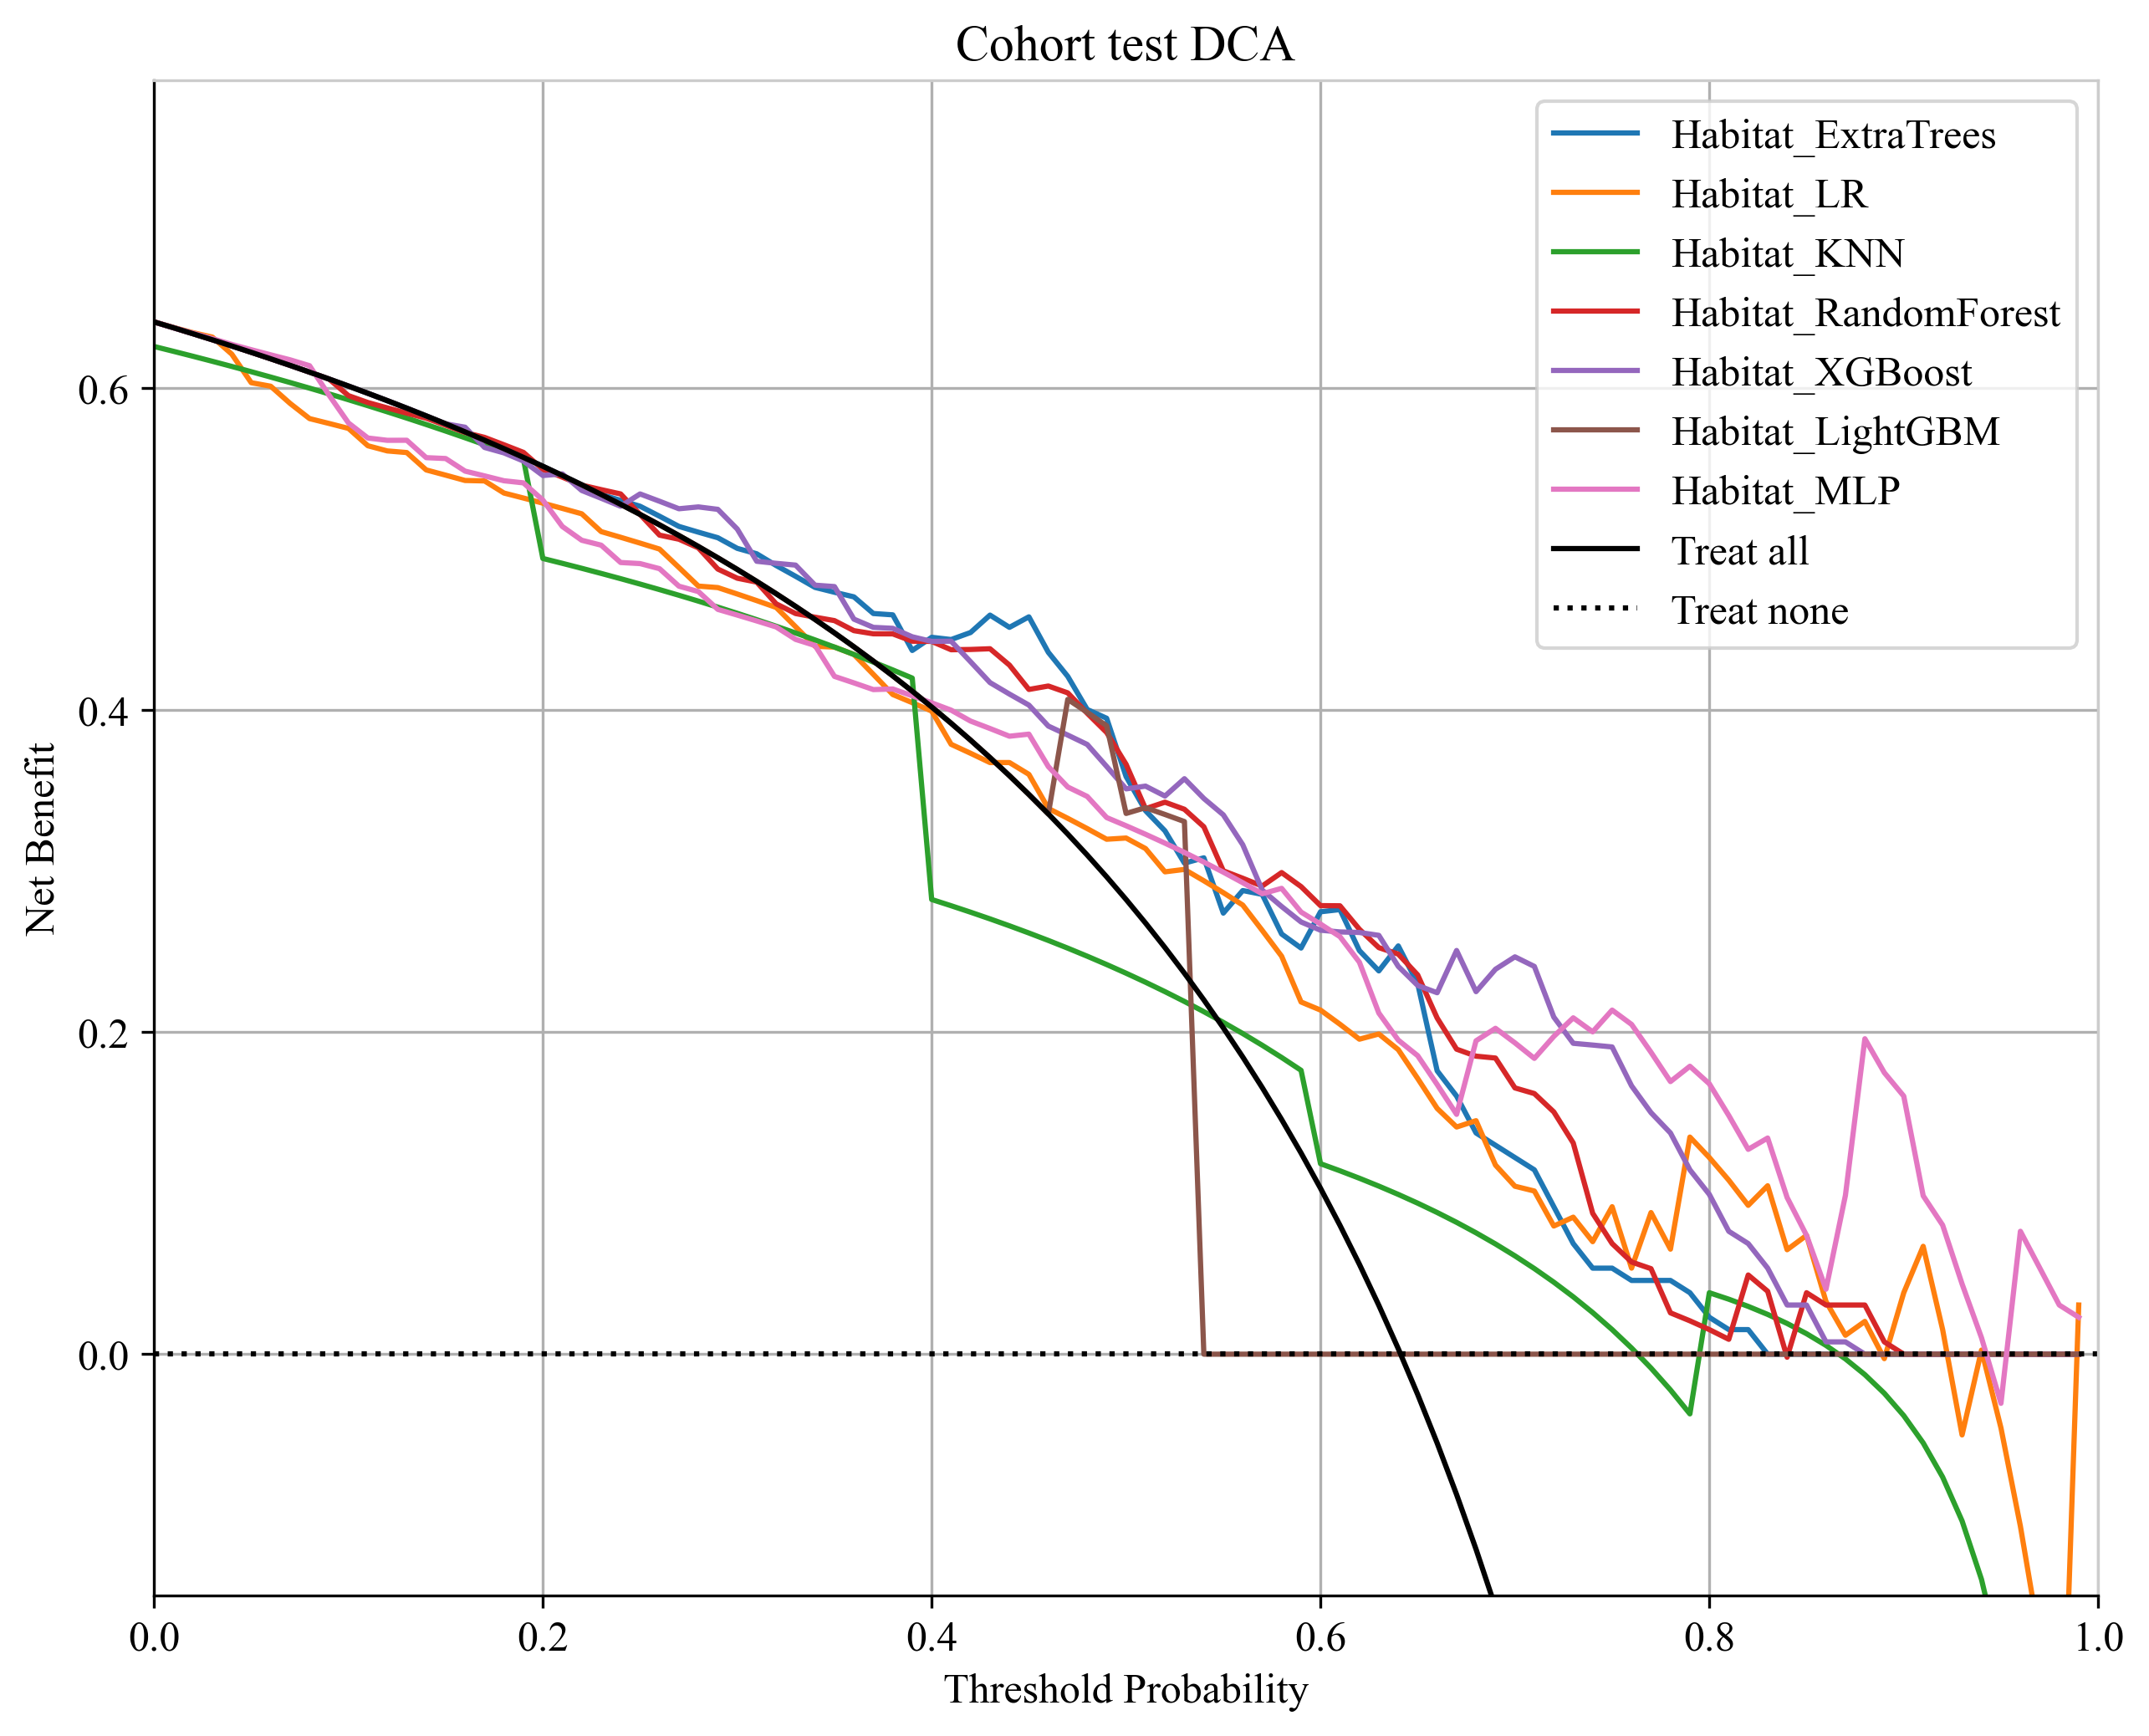

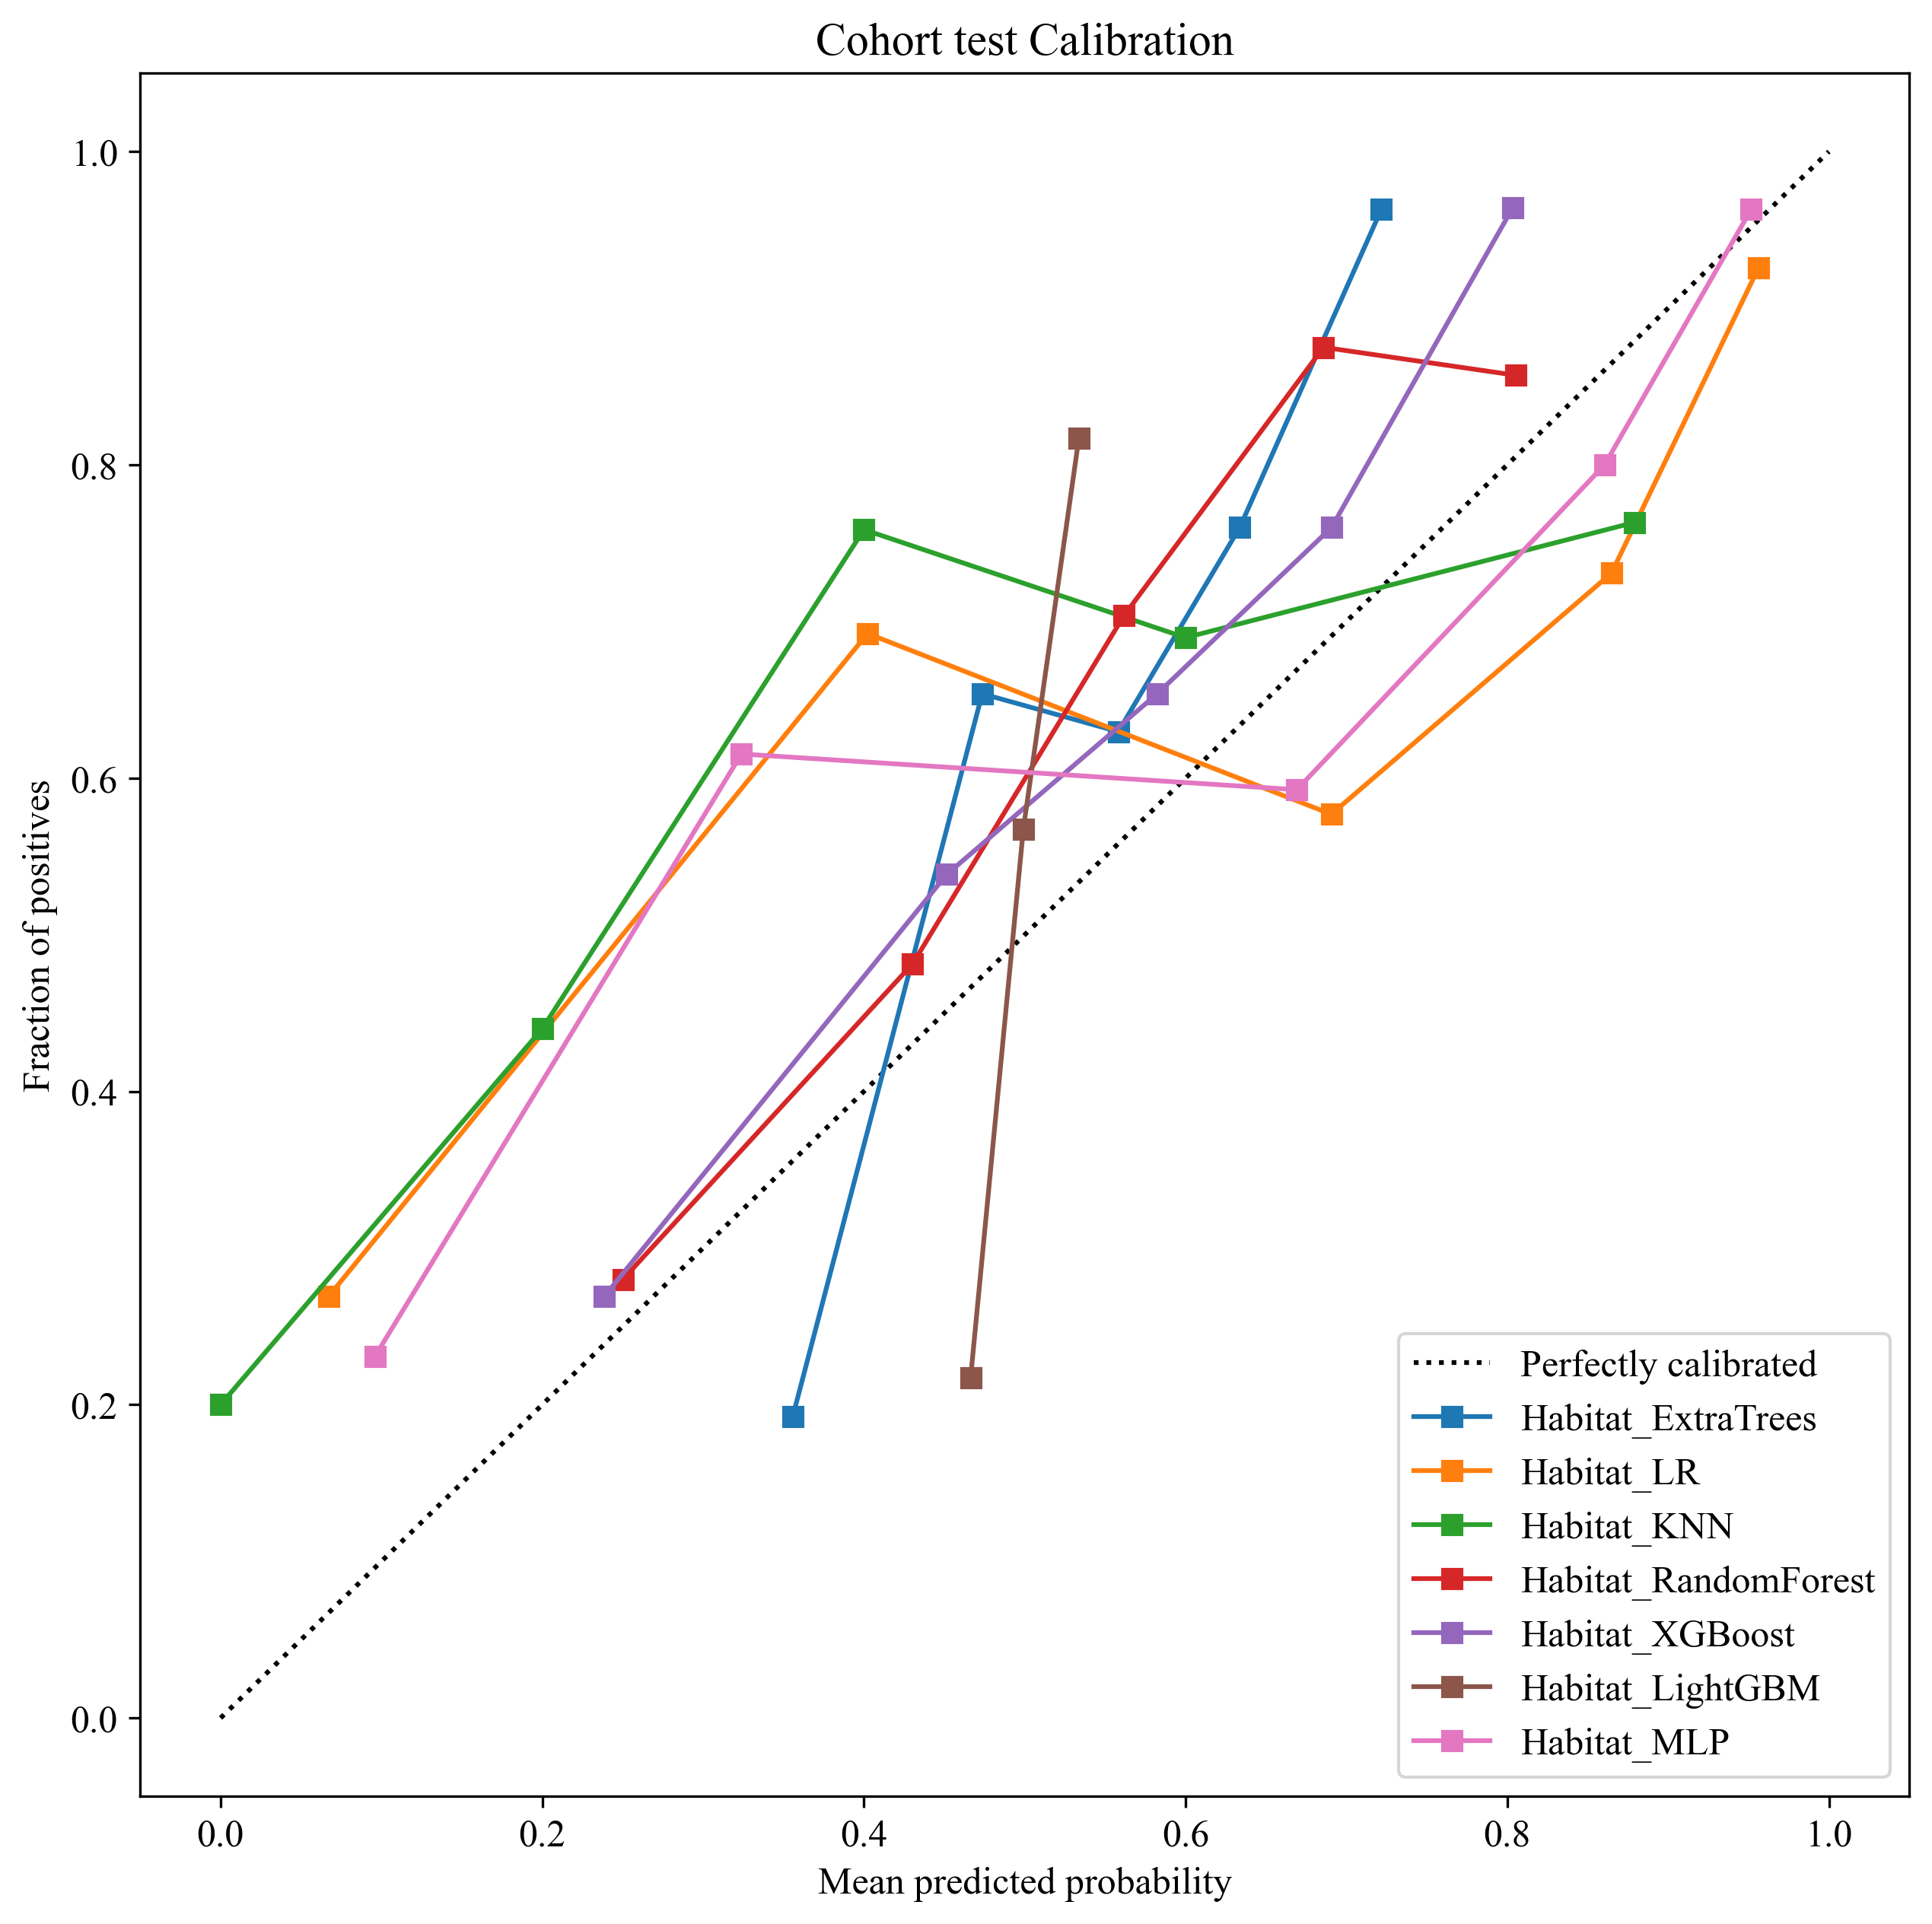

Habitat_ExtraTrees  Habitat_LR  Habitat_KNN  Habitat_RandomForest  \
0           1.940e-13   9.872e-01        0.059                 0.013   
1           6.077e-03   0.000e+00        0.000                 0.478   
2           8.673e-03   3.166e-07        0.000                 0.128   

   Habitat_XGBoost  Habitat_LightGBM  Habitat_MLP Cohort  
0        4.954e-11         1.477e-05    1.365e-01  train  
1        2.756e-01         1.434e-02    0.000e+00    val  
2        3.102e-01         7.592e-03    1.379e-05   test

In [2]:
import pandas as pd
from onekey_algo.custom.components.comp1 import normalize_df, merge_results
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from onekey_algo.custom.components import metrics
from onekey_algo.custom.components.delong import delong_roc_test
from onekey_algo.custom.components.comp1 import draw_matrix
from onekey_algo.custom.components.metrics import NRI, IDI
from onekey_algo.custom.components.comp1 import plot_DCA
from onekey_algo.custom.components.comp1 import draw_calibration
from onekey_algo.custom.components import stats
from onekey_algo.custom.components.metrics import analysis_pred_binary

hosmer = []
youden = {}
metric = []
fig_size = (5, 4)
for subset in [s for s in get_param_in_cwd('subsets', ['train', 'test'])]:
    ALL_results = None
    for mn in  model_names:
        r = pd.read_csv(f"./results/{mn}_{subset if subset == 'train' else 'test'}.csv")
        r.columns = ['ID', '-0', mn]
        if ALL_results is None:
            ALL_results = r
        else:
            ALL_results = pd.merge(ALL_results, r, on='ID', how='inner')
    Clinic = pd.read_csv('data/clinic_sel.csv')
    cnames = [c for c in Clinic.columns if c not in ['ID', 'group', 'label']]
    ALL_results =merge_results(ALL_results, Clinic[['ID'] + cnames], label_data[label_data['group'] == subset], label_col='ID')
    ALL_results = ALL_results.dropna(axis=1)
    display(ALL_results)
    # 绘制整体的ROC曲线
    pred_column = [f'{task}-0', f'{task}-1']
    gt = [np.array(ALL_results[task]) for _ in model_names]
    pred_train = [np.array(ALL_results[d]) for d in model_names]
    okcomp.comp1.draw_roc(gt, pred_train, labels=model_names, title=f'Cohort {subset} ROC', auto_point=False)
    plt.savefig(f'img/mc_{subset}_auc.svg')
    plt.show()
    
    # 汇总所有的Metric
    for mname, y, score in zip(model_names, gt, pred_train):
        # 计算验证集指标
        acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y, score)
        ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
        youden[mname] = thres
        metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, subset))
    metric_ = pd.DataFrame(metric, index=None, columns=['Signature', 'Accuracy', 'AUC', '95% CI',
                                                       'Sensitivity', 'Specificity', 
                                                       'PPV', 'NPV', 'Precision', 'Recall', 'F1',
                                                       'Threshold', 'Cohort'])

    display(metric_)
    
    # 绘制Delong
    delong = []
    delong_columns = []
    this_delong = []
    plt.figure(figsize=fig_size)
    cm = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            if i <= j:
                cm[i][j] = np.nan
            else:
                cm[i][j] = delong_roc_test(ALL_results[task], ALL_results[mni], ALL_results[mnj])[0][0]
    cm = pd.DataFrame(cm[1:, :-1], index=model_names[1:], columns=model_names[:-1])
    draw_matrix(cm, annot=True, cmap='jet_r', cbar=True)
    plt.title(f'Cohort {subset} Delong')
    plt.savefig(f'img/mc_delong_each_cohort_{subset}.svg', bbox_inches = 'tight')
    plt.show()
    
    # NRI
    delong = []
    delong_columns = []
    this_delong = []
    plt.figure(figsize=fig_size)
    cm = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            cm[i][j] = NRI(ALL_results[mni] > youden[mni], ALL_results[mnj] > youden[mnj], ALL_results[task])
    cm = pd.DataFrame(cm, index=model_names, columns=model_names)
    draw_matrix(cm, annot=True, cmap='jet_r', cbar=True)
    plt.title(f'Cohort {subset} NRI')
    plt.savefig(f'img/mc_NRI_each_cohort_{subset}.svg', bbox_inches = 'tight')
    plt.show()
    
    # IDI
    delong = []
    delong_columns = []
    this_delong = []
    cm = np.zeros((len(model_names), len(model_names)))
    p = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            cm[i][j], p[i][j] = IDI(ALL_results[mni], ALL_results[mnj], ALL_results[task], with_p=True)

    for d, n in zip([cm, p], ['IDI', 'IDI pvalue']):
        plt.figure(figsize=fig_size)
        d = pd.DataFrame(d, index=model_names, columns=model_names)
        draw_matrix(d, annot=True, cmap='jet_r', cbar=True)
        plt.title(f'Cohort {subset} {n}')
        plt.savefig(f'img/mc_{n}_each_cohort_{subset}.svg', bbox_inches = 'tight')
        plt.show()
        
    # DCA
    plot_DCA([ALL_results[model_name] for model_name in model_names], 
             ALL_results[task], title=f'Cohort {subset} DCA', labels=model_names, y_min=-0.15)
    plt.savefig(f'img/mc_{subset}_dca.svg')
    plt.show()
    
    # Calibration
    draw_calibration(pred_scores=pred_train, n_bins=5,
                     y_test=gt, model_names=model_names)
    plt.title(f'Cohort {subset} Calibration')
    plt.savefig(f'img/mc_{subset}_cali.svg')
    plt.show()
    
    # HLTest
    hosmer.append([stats.hosmer_lemeshow_test(y_true, y_pred, bins=10) 
                  for fn, y_true, y_pred in zip(model_names, gt, pred_train)])
pd.concat([pd.DataFrame(hosmer, columns=model_names), pd.DataFrame(get_param_in_cwd('subsets'), columns=['Cohort'])], axis=1)